# Section 3: Animating the structure - stochastic modeling 
All the theory (theories?) we have constructed and formalized in the previous notebook Section 2 - Animating the structure were based on a single principle: that the <b> relative change in the value of variables during a very short time interval was very small </b>. Thus, we could formalize the model hypotheses by constructing balance equations where the change in biological variables during a short time increment $dt$ is proportional do this time increment. 

This ceases to be true when either 1) the number of model objects is small or 2) we look at the model at a zoomed-in, microscopic scale. Both in fact are related: 1) Imagine there are 4 mRNAs of a given protein in a cell, and a 5th mRNA is transcribed. Immediately before the 5th transcript is released (say, time $t_0-dt/2$), there are 4 mRNAs. Immediately after it is released (say, time $t_0+dt/2$), there are 5. This is a 20% change in mRNA concentration, within only a tiny tiny tiny time increment $dt$ around the instant of release, $t_0$. And $dt$ can be as small as we can imagine (immediately before release: 4 mRNAs; immediately after, 5). If we wanted to plot the concentration of mRNAs in the system as a function of time, we would get no change, then suddenly an <b> abrupt increase at exactly </b> $t=t_0$, then no change again. Instead of a smooth variation, we would have a step like variation. If we wanted to define a derivative for the concentration of mRNA with respect to time at the time $t=t_0$, we would get a divergent (almost infinite) value because we would divide a “not so small” difference (20%) by a very small time increment $dt$. 

<b> Hence the formalism we have developed so far is not adapted to these situations, where there are not so many model objects present so that the apparition, conversion, or disappearance of just one single object causes relatively important changes in the total number of objects </b>.  

Now imagine we have a system with millions of objects of each type, so that continuous modeling is adapted, but we zoom in, zoom in, zoom in to describe properties of the system at the nanometric scale, where we are considering small volume elements where each element has only a handful of objects of each type. Then we are in the situation 1), and continuous modeling in not adapted either. 

When continuous modeling is not adapted, we have to develop a stochastic formulation of our model structure and hypotheses. A rule of thumb to know whether stochastic modeling is needed, or continuous modeling is good enough, is to ask, for any object of the model: “does that change the system overall if I add or remove a couple of objects”? If yes, then stochastic modeling is recommended. 

We stress that even when stochastic modeling is required, it can still be useful to make a continuous ODE/PDE-based description of the model. Indeed, stochastic models cannot be solved analytically generally speaking, and we often use stochastic simulations to implement models. Having an analytically solvable ODE/PDE-based description allows to identify possible dynamical regimes, and the ranges of parameters in which these regimes are expected, hence providing a way to reduce the number of stochastic simulations that will need to be performed to explore the parameter space. General conclusions drowned by continuous models, on e.g. the existence of particular dynamical regimes, long-lasting states… remain often true in the stochastic situation, the difference being that some of the regimes which are more sensitive to molecular noise will not be dynamically achieved in the stochastic situation.


## When stochastic modeling is required: notions of biological noise
Biological systems are often good candidates for stochastic modeling. There is a sufficiently large number of interacting elements of each type (proteins, mRNAs, solutes, small molecules, chemokines/cytokines…) so that trying to solve the “equations of motion” in a pure applied physics framework is clearly out of reach. Yet, very important proteins can be found as 20-200 copies in an entire cell, mRNAs transcripts of a particular gene are often a handful, and it goes without saying that secretory vesicles are individual objects and that continuous fluxes of vesicles when modeling inter-organelle communication, or neuronal secretion, is a mind-view. As reflected, for instance, by transmission electron microscopy in porcine pituitary cells (image below, from https://doi.org/10.1177%2F153537020422900707 , dark circles are secretory vesicles, scale bar is 0.5$\mu$m so we’re not “zooming in too much”, we are still at the basic cellular/sub-cellular scale. 

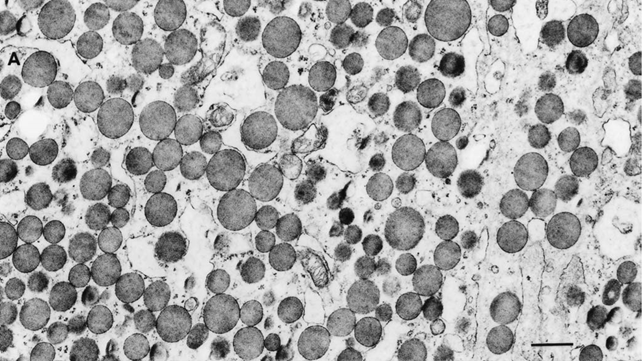


How are biological processes regulated? By molecular interactions. The interaction between two molecules in a complex intra- (or extra-) cellular environment happens when the two molecules are close enough to each other, so that chemical bounds can form. It is a bit of a miracle, if one thinks about how likely molecules are to <b> not </b> cross each other’s trajectory. But yet, interactions happen, and at the microscopic scale, whether two molecules meet at a particular time or a particular location is (or at least, seems) essentially random. 
<b> Cells are a mix of biomolecules that permanently move, shock each other, get stuck, released … </b> and <b> when, where, and how exactly </b> all of these individual events happen is essentially random. As a consequence, identical cells, i.e. cells from the same tissue within the same organism which have then both the same genetic material and are differentiated in the same way, are a tiny bit different at every instant of time. These tiny difference can be in expression levels of proteins, different sizes, different internal structures… and lead to variable phenotypes, both across isogenic populations and in individual cells over time. This <b> cell-to-cell variability </b> is one important instance of what we call the <b> biological noise </b>. Another one is variability in the <b> extra-cellular environment </b>. Both can have important biological and medical consequences. For instance, variability in gene expression patterns across a population of cells affect the cells' physical dimensions (size and intra-cellular scaling), the ability to respond to stimuli though external information monitoring and processing…  

Biological noise can arise from intra-cellular variables, such as gene expression patterns, in which case it will generally be referred to as <b> intrinsic noise </b>. It can also arise from variability in external stimuli, like for instance local random fluctuations of chemoattractants, nutrients, growth factors… , and that will also of course affect the cell’s behavior. This situation will be referred to as <b> extrinsic noise </b>. Hence, even when cellular  response pathways that might be described with continuous ODE/PDE-like modeling frameworks, in the presence of extrinsic noise then stochastic description might be desirable. 

Evolution has likely shaped molecular networks to optimize their response to particular types of noise, because biological noise can be sometimes beneficial, sometimes harmful to the cell. Indeed, some cellular functions like the detection of toxins prior to activation of cellular pumps must be able to respond to very low and hence stochastic toxin levels and thus “amplify” the external noise. In contrast, the signaling pathways that control cell division must be robust to both intrinsic and extrinsic variability, so that cell division is not triggered randomly but following a particular, precise agenda.   

Understanding how cells process (and make use of! or suffer from…) biological noise is one of the current key challenges in cell biology and biomedicine, and it is a challenge that cannot be tackled without mathematical modeling tools. 

Moreover, <b> it is impossible to fully understand the response to biological noise with a ODE/PDE model </b>, because these models are, per essence, “deterministic” meaning that there is no room for randomness. ODE/PDE models can help to predict to which variables or parameters the output of a system is more sensitive, hence providing some insight on the response to biological noise, but are <b> unable to generate cell-to-cell variability in the mathematical model output </b> that could be compared with cell-to-cell variability measured in experiments. 

Hence, stochastic modeling has to key advantages over continuous modeling: 1) it allows to describe situations where continuous modeling is inadequate, and 2) it provides a way to mimic the randomness of biomolecular processes and therefore to analyze how the cell-to-cell variability generated by a particular model structure, with its underlying biological hypotheses, compares to the measured variability. This latter point is key when it comes to model validation.   

So let’s learn how to construct a stochastic version of a (mathematical) model.
 
## Random variables and probability distributions: general considerations

As discussed above, in a continuous model the state of the system at the time $t+dt$ is extremely close to the state of the model at time $t$ (as close as $t+dt$ is from $t$). So the new state cannot be “anything”. In stochastic modeling, this is not true: remember the mRNAs examples, you can get a 20% increase in a finger snap. Hence, even if you know the system at time $t$, the system at time $t+dt$ can be <b> virtually anything </b>,  well obviously with <b> some probability </b> and states quite close to the state at time $t$ are more likely to happen. 

Hence, we quickly realize that, unlike in continuous modeling where they were the convenient “language”, <b> in stochastic modeling concentrations are not the ideal variables </b> to deal with. Because  <b> anything </b> for a concentration, that can mean a lot of different possible values to consider…. Rather, we will come back to the more natural description of the system, and consider each model object <b> individually </b> . Biomolecules, and bigger objects like aggregates, vesicles, or even organelles (e.g. lysosomes, mitochondria…) will be <b> counted </b> and we will model the evolution of their <b> numbers </b> as a function of time. Numbers are more convenient that concentrations in the sense that they cannot be completely anything, they can be just 0, 1, 2 … 12…. 140… 1456… ok you get the point. It is just a more natural way of thinking about this.  

### Random variables and probability distributions:

And in stochastic modeling, these numbers can take any value <i> a priori </i>.  They are what mathematicians call  <b> Random Variables </b>, i.e. variables that can take random values. But in the general case, all these values are not equiprobable, and a protein that has a weak promoter will be expressed more likely as 100, 150 copies than 140,000,000 copies. Hence, random variables are generally associated with <b> a number of probabilities for each value that the random variable can physically take </b>. 

Let’s put this in equations. Let $N$ be the random variable representing the number of mRNA transcripts of a given gene $G$ at a given time $t$. In deterministic (e.g., continuous) modeling, all the information about the transcription kinetics of $G$ would be enclosed in a function $N(t)$: if you know this function, you know everything you have to know about the expression of this gene and you will construct and solve equations for $N(t)$. In stochastic modeling, 

$N$ <b> can take any value at each instant of time </b> $t$. $N$ can be anything:0, 1, 2, …. to infinity. However, <b> not all these values have the same probability </b>. So we define a <b> Probability distribution </b>

$$P_n(t) = Proba(N=n \, at \, time \, t)$$   

that must satisfy the condition of normalization:

$$ \sum_{n=0}^{\infty} P_n(t)=1 $$

at any time $t$. This just reflects that fact that at any instant of time, the sum of the probabilities of all possible values of $N$ is 1. 

And in stochastic modeling, you don’t look for $N(t)$, you don’t care about it, it has <b> no existence </b>. What exist, though, and is important to know, is all these numbers $P_n$ at each time $t$: if you know all these numbers at each instant of time, or equivalently is you know all the functions of time $P_n(t)$, you know all you have to know about the system. 

So these  $P_n(t)$ are what we are looking for, and are the mathematical quantities for which we will try to write (and solve) equations. But rather than one equation for $N(t)$, we have now an infinity of equations, because there can be n=0, or n=1, or n=2 … transcripts. So the problem appears much more complicated. And it is. 

How do these $P_n(t)$, that we call the time-dependent probability distribution of the random variable $N$, tell us something about the system? Well, individually, nothing really interesting. In general we won’t pay too much attention to the odds to get exactly 13 transcripts, $P_{13}(t)$. But the entire probability distribution is an estimate of the cell-to-cell variability you might expect over a large population of cells. Imagine you have constructed a model for the expression of the gene $G$, solved it in the steady state and found the steady state probability distribution $P_n(t\rightarrow \infty)$. In parallel, you have measured the number of transcripts of the gene in a large population of cells, found different values across cells, and plotted the distribution of values you got. Then, this distribution should overlap $P_n(t\rightarrow \infty)$. If it does not, your model is not completely right. And even if <b> the average number of transcripts </b>, which you compute as 

$$<N>= \sum_{n=0}^{\infty} n*P_n(t)=1 $$

is the same than in the experiments. 

So in stochastic modeling, we will have to manipulate probability distributions. This is a particular field of mathematics, that comes with its own language and set of key formulas. We will discuss some of them below, but handbooks of mathematical functions (e.g. Abramovitz-Stegun) are also a very valuable source of useful formulas in stochastic modeling. 

### Key formulas from probability theory:
 
 
Maybe this section is a bit tedious, but it is necessary, at least to understand the concepts and why we cannot work with random variables as we did for deterministic variables.

First of all, the probability distribution $ P_n(t) = Proba(N=n\,at\,time\,t)$ of a random variable $N$ must always be normalized, i.e.:

$$ \sum_{n=0}^{\infty} P_n(t)=1 $$

This property will often be used to simplify the calculations. In addition, two random variables which have the <b> same probability distribution are considered equal </b>: if we have to random variables $N$ and $M$, and we have $Proba(N=n\,at\,time\,t) = Proba(M=n\,at\,time\,t)  $ then we will write $M(t)=N(t)$. This is a shortcut. Let’s drop the time variable for a while for simplicity, but what we write below has to be satisfied at any instant of time. We’ll bring the time variable explicitly back soon.

The expectation value of the random variable $N$ is given by: 

$$<N>= \sum_{n=0}^{\infty} n*P_n $$


More generally it is 

$$<N>= \sum_{all\,values\,that\,N\,can\,take} (value\,of\,N)*Proba(value\,of\,n) $$

but in biology random variables will generally be number of objects so we’ll keep all the notations as if $N$ could take all integer values from 0 to infinity, however everything extends to other values that the random variable could take. 


By <b> expectation value </b> it is meant that it is the <b> typical value that we might expect </b> for the random variable $N$. It is the equivalent of the common sense expression of <b> average value of </b> $N$. 

Indeed, if we were measuring the random variable $N$ in trillions of trillions of experiments (e.g., number of mRNAs transcripts of the gene $G$ in trillions of trillions of cells), then we could bin all the values of $N$ we found in all cells (say, $K$ cells in total). $k_0$ cells would have no mRNA of this gene, $k_1$ cells would have 1 mRNA of this gene, … $k_23$ cells would have 23 mRNA of this gene … and thus, we would have $k_0+k_1+k_2 … =K$, after having binned all cells. Hence, we would have $k_0/K+k_1/K+k_2/K … =1$, and the $ P_n=k_n/K$ would be a pretty good approximation of the underlying probability distribution of $N$, at least if $K$ is large enough. Now in this same experiment, if we want to compute the average number of mRNAs, we would naturally sum for all cells and divide by the number of cells, and we would get $<N>= \sum_{n=0}^{\infty} n*k_n/K $, which is nothing else than $<N>= \sum_{n=0}^{\infty} n*P_n $.

If $N$ is a random variable, then any function of $N$ denoted $F(N)$ is also a random variable, which can take all the “images” by the function $F$ of all the values that the random variable can take. For instance, if the random variable $N$ can take all integer values $n=0,1,2…$ then $F(N)$ can take the values $F(0),F(1),F(2)…$ with the <b> same probabilities </b>. Think about the previous example with the mRNAs, assume that instead of just counting the number of mRNAs you compute, for each cell, the exponential of the number of mRNAs, you would just bin the same cells together. Hence, you would get the same probability distribution. An important consequence of this is that if $N$ is a random variable, then the expectation value of any function $F(N)$ is: 

$$<F(N)>= \sum_{n=0}^{\infty} F(n)*P_n $$

This is in particular true for the random variable $N^2$, which can take all the values $0^2, 1^2, 2^2, 3^2 … n^2 …$ where $n$ is an integer, with the same probability distribution $P_n$ as the probability distribution with which $N$ can take the values $0, 1, 2, 3 … n …$. The expectation value of $N^2$ is then: 

$$<N^2>= \sum_{n=0}^{\infty} n^2*P_n $$

This is also true for the multiplication of a random variable by a number $\alpha $ which is <b> NOT </b> a random variable (it can be anything, as long as it has a definite value). If $N$ can take the values $0, 1, 2, 3 … n … $ with probabilities $P_n$, then $\alpha N$ can take the values $\alpha * 0, \alpha*1, \alpha*2, \alpha*3 … \alpha*n …$ with the same probabilities $P_n$ and the expectation value of $\alpha N$ is: 

$$<\alpha N>= \sum_{n=0}^{\infty} (\alpha*n)*P_n =  \sum_{n=0}^{\infty} \alpha*(n*P_n) $$

and because the value of $\alpha$ is independent of the values $n$ that the random variable can take, we get 

$$<\alpha N>= \alpha  \sum_{n=0}^{\infty} (n*P_n) = \alpha * <N>.$$

Note that this extends to the sum of a random variable with something that is not a random variable (e.g. any number $\gamma$), or to the sum of two random variables $N$ and $M$ and even more generally to a linear combination of two <b> different </b> random variables: 

$$<N + \gamma >=  <N>+\gamma,$$

$$<N + M >=   <N> +  <M>,$$

and

$$<\alpha *N + \beta *M + \gamma > =  \alpha * <N>+\beta * <M> + \gamma..$$


where $\alpha $, $\beta $ and$\gamma$ are anything but not random variables. In general, 

$$ <N*M> \neq <N>*<M> $$

where $N$ and $M$ are random variables. 

The variance of a random variable is the expectation value of the <b> deviation of the variable relative to its expectation value </b> ($< N-<N>>$), in other words how much it varies from sample to sample. Let’s denote $N_0=<N>$ the expectation value of $N$ to make things clearer. Because $N$ is a random variable, $N-N_0$ is also a random variable. And if we apply the rules above,  $<N-N_0> =<N>-N_0$ and by the definition of $N_0$ it is null. Hence, this definition of the variance leads always to $0$ and does not bring any useful information on how much the random variable changes from sample to sample. Hence, we have “squared” the expression, to obtain something that is <b> really informative </b>, and therefore we define the variance of a random variable $N$ as: 

$$ Var(N)=< \, (N-<N>)^2 \,> $$

<b> Exercise 1: </b> This is a very classic one, but useful to see if you master the rules above. Show that  

$$ Var(N)=<N^2>-<N>^2 $$


In [72]:
#%run solutionExercise1.py

We often define the standard deviation as the square root of the variance, which is more convenient somehow because the standard deviation has the same unit as the random variable (while the variance has unit^2):

$$\sigma(N)=\sqrt{Var(N)}=\sqrt{<N^2>-<N>^2 }.$$

The variance of a linear function of one random variable also has a simple expression:

$$ Var(\alpha+\beta * N)=\beta^2*Var(N) $$

This means that 1) an additive number (i.e., anything which is not a random variable, could be a number, a function of time, of space, or another biological variable that can be considered as non-stochastic), so <b> an additive number </b> $\alpha$ <b> does not contribute to the variance </b> (indeed, it is not “random” so does not vary from sample to sample!), and 2) because the variance scales as $N^2$, the linear coefficient in front of $N$ is squared. 

The probability distribution, expectation value, variance, ... of a random variable (moment=) can be estimated from just <b> one single function </b>. This function is a kind of mathematical trick we use to transform a discrete probabilistic problem into a <b> continuous problem for which we can use all the arsenal of ODEs/PDEs solving techniques </b>. So yes, that’s <b> very useful </b>. This trick is called the <b> generating function </b>. For a random variable $N$ with a probability distribution $P_n$, we define the generating function $G_N(x)$ as:

$$ G_N(x)= \sum_{n=0}^{\infty} (x^n*P_n) $$

This generating function contains <b> all the information that is encoded in the probability distribution </b> $P_n$, so the two description are formally equivalent: finding all the $P_n$ allows to compute $G_N(x)$ for all $x$, and conversely <b> knowing, for all x, the value of the generating function </b> $G_N(x)$ allows to compute $P_n$. How?  

$$ P_0 = Proba(N=0) = G_N(x=0),$$

$$ P_1 =Proba(N=1) = \frac{dG_N}{dx}(x=0),$$

where the derivative of $G_N$ with respect to $x$ is computed at $x=0$. Indeed, for the first one we have $ G_N(0)= \sum_{n=0}^{\infty} (0^n*P_n) $ and $0^n=0$ for any $n>=1$, only the term $n=0$ is non null because $0^0=1$. Hence, $ G_N(0)=P_0$. Similarly, $\frac{dG_N}{dx}=\sum_{n=1}^{\infty} (n*x^{n-1}*P_n)$ and when the derivative is computed in $x=0$ using the same trick we get $\frac{dG_N}{dx}(x=0)=\sum_{n=1}^{\infty} (n*0^{n-1}*P_n)$ where $0^{n-1}=0$ except for $n=1$.... and we get $P_1=\frac{dG_N}{dx}(x=0)$. All the individual probabilities can be obtained the same way, some numerical coefficients arise when doing the calculations so you can just rely on the following formula:

$$ P_n =Proba(N=n) = \frac{1}{n!} \frac{d^nG_N}{dx^n}(x=0)$$

where the symbol $\frac{d^nG_N}{dx^n}(x=0)$ means <b> derive the function </b> $G$ <b> n times, then take </b> $x=0$, and $n!=1*2*3...*n$ is the <b> factorial of n </b>, a quantity that will often appear in stochastic modeling.  


In practice, deriving the same function a large number of times is not convenient. But we generally <b> never use all the probabilities individually </b>, rather we use them to compute expectation values, variances… And those can be <b> directly obtained from the generating function </b>:

$$<N> = \frac{dG_N}{dx}(x=1)$$

where the derivative of $G$ is computed in $x=1$ this time, and 

$$Var(N)= \frac{d^2G_N}{dx^2}(x=1)+ \frac{dG_N}{dx}(x=1)- \displaystyle \Bigg( \frac{dG_N}{dx}(x=1)\Bigg)^2 $$

Thus, and this is the important thing to remember, knowing the generating function or knowing the probability distribution is equivalent. It is noteworthy that this approach is valid only when the random variable can take all positive or null integer values $N=0,1,2…$. As stressed above, this is most always the case in biological systems. 

So far we have mostly dealt with one single random variable. In practice, models often encompass multiple random variables. So it is important to understand how they affect each other and to learn the language associated with multiple random variables. 

If we have two random variables $N$ and $M$ that can take different values (which we will denote $n$ and $m$, they could be identical or different…) we call a <b> joint probability </b> the probability 

$$P_{n,m}=Proba(N=n \,and \, M=m)$$

that we both have $N=n$ and $M=m$ realized. Of course, if we sum the joint probability over all the possible values n, m (i.e., all the <b> possible pairs of values </b>), we find 1:

$$\sum_{all\,values\,of\,n} \displaystyle \Bigg( \sum_{all\,values\,of\,m} P_{n,m} \Bigg) = \sum_{all\,values\,of\,m} \displaystyle \Bigg( \sum_{all\,values\,of\,n} P_{n,m} \Bigg) = 1 .$$

We can start summing with respect to $n$, or $m$, we find the same result. We can shorten the representation of these double sums as :

 $$\sum_{n \, ,m} P_{n,m} = 1.$$

We call the <b> the marginal probability distribution for </b> $N$ the ensemble of the probabilities that $N$ takes each of its possible values, <b> irrespective of the values of </b> $M$. Similarly, we call the <b> the marginal probability distribution for </b> $M$ the ensemble of the probabilities that $M$ takes each of its possible values, <b> irrespective of the values of the other random variable </b> $N$. Let us denote $Q_n=P(N=n)$ (in “absolute”, irrespective of M) and $R_m=P(M=m)$ (in absolute) the marginal distributions for $N$ and $M$ respectively. Both are related to the joint distribution by the following: 

$$Q_n=P(N=n)=\sum_{all\,values\,of\,m} P_{n,m}$$

$$R_m=P(M=m)=\sum_{all\,values\,of\,n} P_{n,m}$$

This makes a lot of sense: over all the possible combinations of values of $N$ and $M$, i.e. the pairs $(n,m)$, the ones which shall be counted to compute $Q_3$ for instance are all those with $n=3$, but any values of $m$ shall be accounted for, this is why we sum over all values of $m$. 

The notions of joint and marginal probability distributions are important to understand the notion of <b> conditional probability distribution </b>. What does that mean? The joint distribution $P_{n,m}$ is the probability that both the events $(N=n)$ and $(M=m)$ are realized, irrespective of whether they are correlated or not. The marginal distributions $Q_n$ and $R_n$ are the probabilities that the events $(N=n)$ and $(M=m)$ are realized, respectively, irrespective of whether the other event is realized or not. What we called a conditional probability is <b> in between </b>: it measures the <b> probability that one event is realized </b> if we <b> know for sure that the other event is realized </b>. In other words, if you are looking for the conditional probability $Proba(N=n \,knowing\,that\,M=3)$, then throw away all $(n,m)$ pairs for which $m \neq 3$, and compute the probability of having $N=n$ among the pairs you still have in hand. We use the following notation: 

$$Proba(N=n \,knowing\,that\,M=m) = P(N=n|M=m)$$

and (it is generally completely different!)

$$Proba(M=m \,knowing\,that\,N=n) = P(M=m|N=n),$$

and those conditional probabilities are computed from the joint probabilities and the marginal probabilities:
$$ P(N=n|M=m) = \frac{P(N=n \,and\, M=m)}{P(M=m)} = \frac{P_{n,m}}{R_m}$$

$$ P(M=m|N=n) = \frac{P(N=n \,and\, M=m)}{P(N=n)}= \frac{P_{n,m}}{Q_n}.$$

If the conditional probability $ P(N=n|M=m)$ is equal to the marginal $ P(N=n)$ it means that the value of $M$ does not affect at all the probability to obtain particular values of $N$. In this case, the two random variables are <b> independent </b>. We can see that this is equivalent to say that $ P(N=n \,and\, M=m) = P(N=n)*P(M=m)$. When the joint probability is the product of the two marginals, the two variables are independent. 
Dividing both left and right hand sides of the two equations above that define the conditional probabilities, we get rid of $ P_{n,m}$ and we obtain the <b> Bayes theorem </b>: 

$$ P(N=n|M=m)= \frac{P(M=m|N=n)* P(N=n)}{P(M=n)}.$$

This theorem has profound implications, and we will come back to it when we will discuss parameter estimation from experiments (Bayesian inference). 

But these definitions of the conditional probabilities are also interesting in that they provide two alternative definitions to the joint probability $ P_{n,m}= P(N=n|M=m)*P(M=m)$ and $ P_{n,m}= P(M=m|N=n) *P(N=n)$ (just by “inverting” the relations above and using the general notations $P(N=n)$ and $P(M=m)$ for the marginal probability distributions). An important consequence is that the definitions of the marginal probabilities can also be rewritten in terms of these conditional probabilities, by reporting those expressions for $ P_{n,m}$ in the definitions of the marginals:  

$$P(N=n)=\sum_{all\,values\,of\,m} P(N=n|M=m)*P(M=m)$$

$$P(M=m)=\sum_{all\,values\,of\,n} P(M=m|N=n) *P(N=n).$$

These formula are two expressions (for $N$ and$M$) of the <b> total probability rule </b>. It is key. It means that, when looking for the probability of <i> something </i> (e.g., $P(N=n)$), it is possible to take a step back and ask, “well, if that <i> something else (M=m) is realized </i>, what is the probability of my something?” (that will give $ P(N=n|M=m)$, and this question of course shall always be accompanied by “ what is the probability of this <i> something else </i> ?”. Therefore, we can decompose every event in the an ensemble of events result in this event, and decompose the calculations of the probabilities. 

When modeling time-dependent biological systems stochastically, this is crucial: what is the probability that our system is in a certain state at the time $t+dt$ <b> knowing that it is in a given state at time </b> $t$ ? This is naturally expressed as a conditional probability. 

This bring us to the last notion of this introduction: the <b> state </b> of a stochastic (biological) system. In what follows, the state of a system at the time $t$ will be characterized by <b> the ensemble of the values taken by all the random variables of the model </b>. For instance, modeling a gene expression network with three genes A, B, C, the random variables will be the number of mRNAs transcripts of A, B, C and the number of proteins A, B, C, so a total of 6 positive integer numbers. Choosing a value for each of them (e.g., $n_{mRNA}(A)=2$, $n_{mRNA}(B)=4$, $n_{mRNA}(C)=1$, $n_{prot}(A)=234$, $n_{prot}(B)=1289$ and $n_{prot}(C)=2443$ will give a sextuplet $(2,4,1,234,1289,2443)$ that we will call the <b> state of the system </b>. The probability of this state will therefore be naturally defined as the <b> joint probability </b> :

$$P_{(2,4,1,234,1289,2443)}=P(n_{mRNA}(A)=2 \,and\,n_{mRNA}(B)=4 \,and\, n_{mRNA}(C)=1 \,and\,n_{prot}(A)=234\,and\,n_{prot}(B)=1289\,and\,n_{prot}(C)=2443)$$

To formulate in a stochastic framework our model hypotheses, we will construct equations that connect the different states of the system at the different times, using essentially the key formulas and concepts discussed above. 



## Stochastic modeling (in biological systems): the analytical (dark) side

In stochastic modeling, <b> at any fixed instant of time </b> biological quantities (typically, numbers of biomolecules or bio-objects) are represented by random variables. But what about the <b> time evolution </b> of these variables? It is represented by <b> stochastic processes </b>. 

### 1) Stochastic processes: key concepts, definitions, and associated vocabulary

In short, a stochastic process is the ensemble of all the random variables that make the biological at all instants of time. If $E(t)$ is the random variable that represents the number of copies of a given enzyme at a given instant of time $t$, with its probability distribution $P_n(t)=Proba(E(t)=n)$, then the ensemble

$$\displaystyle \Bigg \lbrace E(t), t\in [t_{ini}, t_{fin}] \Bigg \rbrace$$

is the stochastic process that represents the variation of the number of enzymes between$t_{ini}$ and  $t_{fin}$, the initial and final times of our “experiment”.

So the important thing to realize here is that the number of enzymes at two different instants of time, as close or distant as they can be, are just <b> two different random variables </b>. So the same rules apply to them as to any pair of random variables (like the definition of joint, marginal or conditional probabilities, the notion of independence, the Bayes theorem and total probability rule…). If we measure the number of enzymes over time, we say that we have measured one <b> realization </b> of the process, or equivalently one <b> trajectory in the space of states </b> but as you can easily guess, there is an infinite number of such realizations of the stochastic process. 

We can classify the stochastic processes within four sub-types: 
- discrete state/discrete time, when, at each time, there is a finite number of possible states for the variable(s), and the system is allowed to evolve <b> only at some particular times </b> $t_i$ (nothing happens between those times
- discrete state/continuous time, when, at each time, there is a finite number of possible states for the variable(s), but the system is allowed to evolve <b> at any time </b> (even though it doesn’t <i> have to </i> evolve)
- continuous state/discrete time, and continuous state/continuous time, which are similar to the two first sub-types with the difference that at each instant of time, the values of the system are continuous, not discrete.  As already discussed before, in biological systems we are mostly concerned with discrete states, since our random variables are number of biological objects. In addition, the “real” biological variables are continuous time processes because in real life, time flows continuously. However our <b> measurements </b> of such variables is inherently a discrete time process because we don’t follow them continuously, any detector has some limited time resolution and cannot record an infinite number of values for the biological variables. 

So, for the design of predictive mathematical models, aiming to understand the dynamical properties of a biological system, we will most always use continuous time stochastic processes. However, for the purpose of fitting experimental data, discrete time processes might be more adapted to represent the finite number of measurements. 

### 2) Markov chains

We’ll illustrate this concept with discrete time stochastic process but the ideas are very similar for continuous time processes, though the mathematical formulation is a bit different. 

Let’s assume our biological variable is described by a discrete time stochastic process, i.e. by an ensemble of random variables $X_n$ defined at discrete times index by an integer number $n$ (for instance, $t_n=n*\delta t$ where $\delta t$ is some time increment, but it can be any discrete set of times). The random variables can take particular states/values $a,b,c,d….z$ . Let’s assume we are now at the time $t_n$, so that all times $t_{n-1}, t_{n-2}…$ belong to the past and $t_{n+1}$ belongs to the future. With this definition, we can write a conditional probability 

$$P(X_{n+1}=x|X_n=a,\,X_{n-1}=b,\,X_{n-2}=c ….. \, X_0=z),$$

which is no more no less than the probability of the system to be in state $x$ at the next instant of time (Proba(the next random variable equals x)), given that we know it is in state $a$ now, it was in state $b$ just before, in state $c$ a bit before…. and started in state $z$.

Our stochastic process is a <b> Markov process </b> if

$$P(X_{n+1}=x|X_n=a,\,X_{n-1}=b,\,X_{n-2}=c ….. \, X_0=z) = P(X_{n+1}=x|X_n=a),$$

for any possible future state $x$, present state $a$ and past states $b, c, …$. In other words, the probability distribution of the random variable that represents the system at the next instant of time $X_{n+1}$ is conditioned only by the random variable that represents the system at the present time, the random variable $X_n$. In the sense of the independence of random variables (remember from above: if  $ P(N=n|M=m) = P(N=n)$ then the random variables $N$ and $M$ are independent), it means that the random variable $X_{n+1}$ is <b> independent </b> of $X_{n-1}$, $X_{n-2}$, … but not on $X_{n}$ <i> a priori </i>. 

<b> What defines a Markov process is that the future depends only on the current state and not on the system’s history. </b> 

Hence, a discrete time Markov process can be represented as a chain of random variables (at incremented times) where the <b> entire probability distribution of the variable representing the system’s state at the next time can be predicted only from the entire probability distribution of the variable representing the system’s state at the present time </b>, which itself can be predicted by the probability distribution of the random variable representing the system’s state at the time immediately before… . In this sense, for a Markov process the impact of the past on the future is entirely accounted for by the impact of the past on the present. The present state integrates all the effects of the past states. 

This is of <b> outmost importance </b>. If you have strong reasons to believe that your biological system has <b> a memory that leaves no detectable trace on the present, but yet might influence the future </b>, then your system is non-Markovian (not a Markov process) and all that follows in this notebook is irrelevant. It is noteworthy that in a Markovian system, the “past” influences the “future” as well, but <b> through the present only, not independently of it </b>. 


Non-Markovian systems are extremely complicated to model, hence we will always try to adopt the <b> adequate level of details in the stochastic model where all elementary processes are reasonable Markovian </b>. 

Let’s illustrate this statement on a concrete example: the basic enzymatic reaction

$$E+S \leftrightarrow ES \rightarrow E+P$$

where the enzyme $E$ associates with its substrate $S$, forming the enzyme-substrate complex $ES$, within which the substrate is eventually converted in product $P$, releasing the enzyme. These are elementary reactions. Accounting for the fact that the entire process conserves the free enzyme concentration on the long term, Michaelis and Menten have suggested that this 3-step reaction (complex formation, complex dissociation, and product conversion) can be simplified by a single reaction 

$$S \rightarrow P$$

where the rate $\nu$ of the reaction depends on the concentration of substrate $[S]$:

$$\nu=\frac{k*[S]}{[S]+K} $$

where $k$ and $K$ are two constants. In a continuous, deterministic model framework (ODEs/PDEs such as in the notebook Section 2 - Animating the structure), this is indeed a simplification. 

In stochastic modeling, it is not. Indeed, it has been demonstrated both theoretically and experimentally that even if all three elementary processes are Markovian, the $S \rightarrow P$ <b> composite process </b> is not. And it is generally the case for composite reactions. Elementary reaction at the microscopic scale (i.e., one molecule binding to another one) can generally be considered as Markovian with good approximation <b> as long as all the components of the system are accounted for </b>. In the case of enzymatic kinetics, we have tried to develop a model accounting only for species $S$ and $P$, not accounting for $ES$ and $E$, and we transformed a Markovian 3-steps model into a non-Markovian 1-step model.  

Hence, as a rule of thumb, when doing stochastic modeling we will try as much as possible to include all of the relevant elementary microscopic processes in the model. Below, we’ll see how to check if we “did right”. 

Why are Markov processes so convenient? Because along a Markov chain, the future probabilities can be calculated from the present probabilities. In other words, we can parametrize <b> transition probabilities </b> between each pair of states of the system, regroup these transition probabilities in a big matrix, and compute the vector containing the probabilities of all states at the next time by multiplying the vector containing the probabilities of all states at the current time by this transition matrix. We won’t go into the details as we don’t need it. 

But in practice, when building stochastic equations, we will often adopt this strategy of <b> defining and using transition probabilities between all pairs of states of the system </b> to measure the conditional probability

$$P(X_{n+1}=x|X_n=a)$$

and then compute the marginal distribution $P(X_{n+1}=x)$ from this conditional distribution determined from the transition probabilities, and the marginal distribution at the current time $P(X_n=a)$. This way we compute all we have to know about the system sequentially, time after time. It might all seem abstract at this point, but we’ll implement this concretely in the next section. 

For continuous-time processes, the Markovian property means the same thing, i.e. that the “past” influences the “future” only through the present, not independently of it (the system has no “memory”). The notions of transition probabilities and transition matrix also exist, but one noticeable difference is that <b> there are no particular timesteps between which transition probabilities are evaluated </b>. 

This is a very particular and also very useful feature of continuous-time processes: because there are no specific times at which the system is susceptible to evolve, it means that it is susceptible to evolve from one state to another <b> at any time </b>. But it does not change at any, any, any time: there are always time lags during which <b> nothing happens </b> and the system does not change. If the system is very complex, has many components, with frequent interactions, those time lags are not very long: you don’t have to wait a lot until some microscopic event changes the state of the system. But yet, you have to wait <i> some </i> time, might it be femtoseconds or picoseconds. 

And guess what? <b> The waiting time </b> $\tau$ <b> between two microscopic events that change the system is a (continuous) random variable </b>. As any random variable, it has an underlying probability distribution:

$$ P(\tau = t)$$

that obviously decreases with $t$ because the more you wait, the more likely you are to observe a microscopic event that changes the system and thus long waiting times are very rare. 

The Markovian property of a continuous system is equivalent to write that the distribution of waiting times is exponential: there exist a parameter $a$ (that might depend on a lot of things!) so that 

 $$ P(\tau = t)=a*e^{-a*t}$$

This characterizes a Markov process. As we’ll see in the next main section, this property is frequently used to simulate stochastic systems. Also, it might beb used to determine experimentally if a given biological model is Markovian or not (via single molecule measurements). 

### 3) Constructing equations for stochastic processes: biochemical systems

We will start with constructing equations for interacting biochemical systems because the derivation is more intuitive, however the same strategy shall be used regardless of the “nature” of the biological variables. In the following, we will assume the state $S$ of the entire system at any time is a random variable characterized by an integer number of each of its components. In fact, it is a collection of random variables but that’s totally equivalent. 

Let’s apply what we have learnt in the sections 1-2 and apply the total probability rule to the state of the system at time $t+dt$ (in some sense the “soonest future we can think of”), denoted $S(t+dt)$. The marginal probability distribution for $S(t+dt)$ can be “decomposed” onto the different possible states at time $t$ using the total probability rule: 

$$ P(state=s \,at\,t+dt) = \sum_{all \, possible\, states \,s’} P(state=s \,at\,t+dt| state=s’ \,at\,t)* P(state=s’ \,at\,t)$$

which is always true (it is just a total probability decomposition). We can, in the big sum in the right hand side, distinguish the state $s’=s$ which corresponds to no change in the system state between the times $t$ and $t+dt$, from all the other states  $s’ \neq s$ which corresponds to the situation where something changed between the times $t$ and $t+dt$:

$$ P(state=s \,at\,t+dt) = P(state=s \,at\,t+dt| state=s \,at\,t)* P(state=s\,at\,t) +  \sum_{s’\neq s} P(state=s \,at\,t+dt| state=s’ \,at\,t)* P(state=s’ \,at\,t)$$

We can then notice that, regardless of the state $s$ at time $t$, the state at time $t+dt$ <i> has to be something </i>, in other words the sum over all possible states of their probabilities at time $t+dt$ knowing the state is $s$ at $t$ has to be 1:

$$\sum_{all \, possible\, states \,s’} P(state=s’ \,at\,t+dt| state=s \,at\,t) = 1$$

where again, we can separate the case where the states are identical and different:

$$\sum_{s’\neq s} P(state=s’ \,at\,t+dt| state=s \,at\,t) + P(state=s \,at\,t+dt| state=s \,at\,t) = 1$$

and thus 

$$ P(state=s \,at\,t+dt| state=s \,at\,t) = 1 - \sum_{s’\neq s} P(state=s’ \,at\,t+dt| state=s \,at\,t).$$

 We can replace this expression for $ P(state=s \,at\,t+dt| state=s \,at\,t)$ in the equation for the marginal probability distribution at time $t+dt$ and we get:

$$ P(state=s \,at\,t+dt) = P(state=s\,at\,t) (1 - \sum_{s’\neq s} P(state=s’ \,at\,t+dt| state=s \,at\,t)) +  \sum_{s’\neq s} P(state=s \,at\,t+dt| state=s’ \,at\,t)* P(state=s’ \,at\,t)$$

which simplifies to :

$$ P(state=s \,at\,t+dt) = P(state=s\,at\,t)  +  \sum_{s’\neq s} \displaystyle \Bigg[P(state=s \,at\,t+dt| state=s’ \,at\,t)* P(state=s’ \,at\,t) - P(state=s’ \,at\,t+dt| state=s \,at\,t)* P(state=s\,at\,t) \Bigg]$$

or even:

$$ P(state=s \,at\,t+dt) - P(state=s\,at\,t)  = \sum_{s’\neq s} \displaystyle \Bigg[P(state=s \,at\,t+dt| state=s’ \,at\,t)* P(state=s’ \,at\,t) - P(state=s’ \,at\,t+dt| state=s \,at\,t)* P(state=s\,at\,t) \Bigg]$$


We recognize on the left hand side almost the partial derivative with respect to time of the probability distribution of the state $s$: 

$$\frac{\partial P(state=s \,at \,t)}{\partial t}*dt = \sum_{s’\neq s} \displaystyle \Bigg[P(state=s \,at\,t+dt| state=s’ \,at\,t)* P(state=s’ \,at\,t) - P(state=s’ \,at\,t+dt| state=s \,at\,t)* P(state=s\,at\,t) \Bigg].$$

This equation is generally called a <b> master equation </b>. In the case of a (bio)chemical system it is called a <b> chemical master equation </b>, or <b> CME </b>. Scientists can be creative sometimes. Such an equation is a PDE that connects the variations with time of the marginal probability distribution of a random variable (or a collection of variables), with itself and with transition probabilities which are enclosed in the conditional probabilities $ P(state=s \,at\,t+dt| state=s’ \,at\,t)$. 

In the general case (typically non-Markovian), we cannot compute $ P(state=s \,at\,t+dt| state=s’ \,at\,t)$ because we know there is some hidden dependence on the system state at previous instants of time. The conditional probability $ P(state=s \,at\,t+dt| state=s’ \,at\,t)$ still has a meaning, in terms of its original definition as a ratio of joint probability to marginal probability, however it <b> cannot be interpreted in terms of simple, elementary transitions between the systems states. </b>

But in the case of Markovian systems, over a very short time interval $dt$ the conditional probability is simply the product of transition rate $ A_{s’\rightarrow s}$ between the two states and the duration of the time interval:

$$ P(state=s \,at\,t+dt| state=s’ \,at\,t) = dt*A_{s’\rightarrow s}$$

Indeed, a Markovian system has no memory so it is possible to define, in any given state, a probability per unit time to transition into another state. For a non Markovian system this approach becomes untractable, because such a transition rate per unit time would not depend only on the current state but all the past history… which is really not convenient. 

Hence, the Chemical Master Equation for a Markovian system becomes:

$$\frac{\partial P(state=s \,at \,t)}{\partial t}*dt = \sum_{s’\neq s} \displaystyle \Bigg[dt*A_{s’\rightarrow s}* P(state=s’ \,at\,t) - dt*A_{s\rightarrow s’}* P(state=s\,at\,t) \Bigg]$$

or after simplification of the $dt$ factor on both sides:

$$\frac{\partial P(state=s \,at \,t)}{\partial t}= \sum_{s’\neq s} \displaystyle \Bigg[A_{s’\rightarrow s}* P(state=s’ \,at\,t) - A_{s\rightarrow s’}* P(state=s\,at\,t) \Bigg].$$

This formula has a very immediate, simple interpretation: the rate of change of the probability to be in state $s$ is equal to the sum of the transition rates that bring the system into this state from all other states, times the marginal probability to be in such a state, minus the sum of the transition rates that convert the system from the state $s$ into all other states times the marginal probability to be in the state $s$. 

Hence, you should always start from this form, no need to redo the entire derivation. However, it’s good to know how to do it, for instance when it comes to discuss the range of validity of the CME or to account for slightly non-Markovian effects…  leading to different expression for $ P(state=s \,at\,t+dt| state=s’ \,at\,t) $.

We can envision the <b> cooking recipe </b> we will use to write a CME-based fully stochastic formulation of a model:
1) list all random variables that make the model and the values they are biologically/physically allowed to take
2) from the list, define what a <i> state of the system is </i>: e.g., for the three (A, B, C) genes expression network, the state of the system is a sextuplet of integer number $( n_{mRNA}(A),n_{mRNA}(B),n_{mRNA}(C),n_{prot}(A),n_{prot}(B),n_{prot}(C))$. Count the total number of states, $K$.
3) define all possible transitions between the states (agree, there’s a lot: see below), and define a rate parameter to each of those transitions
4) For each of the $K$ state, write the CME that will involve the transition rates defined in 3) and the marginal probabilities of all the states (so, $K$ coupled PDEs): $\frac{\partial P(state=s \,at \,t)}{\partial t}= \sum_{s’\neq s} \displaystyle \Bigg[A_{s’\rightarrow s}* P(state=s’ \,at\,t) - A_{s\rightarrow s’}* P(state=s\,at\,t) \Bigg].$

This is the program to follow. Fortunately, most of the transitions between the states are highly unlikely. Because the cellular and inter-cellular environments are rather dilute, essentially aqueous solutions, biochemical reactions that require three or more interactors are extremely unlikely to happen, as they would require the three molecules (or more) to be exactly at the same point at the same time. Rather, tri-molecular reactions are, in vivo, decomposed by two elementary steps where molecule A meets B and then AB meets C. 

<b> This statement holds for any “composite” transition between the states </b>, that involves more than one elementary reaction: elementary reactions do <b> not </b> happen exactly at the same time. Hence, in practice, the only transitions between states that need to be accounted for in step 3) are the  <b> elementary transitions </b>, the most simple transitions we can think of. 

In biochemical systems, where the states are characterized by the number of each molecule, the only reactions that are accounted for are thus: 
- molecule creation (from nothing, correspond to $+1$ increment of just one of the molecular species)
- molecule disappearance (correspond to $-1$ increment of just one of the molecular species)
- molecule conversion (corresponds to $+1$ increment of one species and $-1$ for another one)
- and bimolecular reactions, that convert species A+B into C (corresponds to $n_A \rightarrow n_A-1$, $n_B \rightarrow n_B-1$, and $n_C \rightarrow n_C+1$.  




How does that work in practice? Let’s consider a simple model of single gene expression. An active promoter leads to the transcription of mRNA molecules, with an average rate $\nu_0$, which are eventually either degraded with a rate $d_0$ or translated into a protein with rate $nu_1$. Proteins are then degraded with the rate $d_1$ (see Figure below, from https://doi.org/10.1073/pnas.0803850105). All rates are defined per “single molecule” and assumed constant (both in time and across samples: those rates are <b> not </b> random variables).

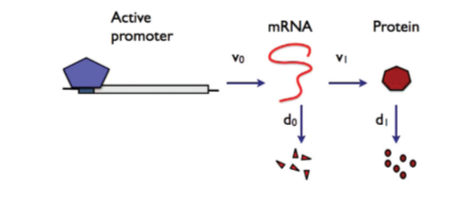

 
The model assumes that the promoter is always “on”, active, and thus there are only two random variables: the number of mRNAs and the number of proteins. Indeed, from one cell to another, even if the gene is constitutively active the number of mRNAs and of proteins will differ, so this system is inherently a stochastic system, and almost the simplest we can think of. Let’s apply the “cooking recipe” we just learnt: 
<i> 1) list all random variables and the values they are allowed to take: </i> the random variables are the number $m$ of mRNA and the number $n$ of proteins. 
<i> 2) from the list, define what a state of the system is:  </i> the system is completely determined if we know both the number of mRNAs and of proteins, hence a state of the system is defined by the pairs of integer numbers: $s=(m,n)$.
<i> 3) define all possible transitions between the states: </i> we only consider the transitions between the states which represent the elementary “reactions” on the figure: $m \rightarrow m-1$ (degradation of one mRNA molecule), $n \rightarrow n-1$ (degradation of one protein), $m \rightarrow m+1$ (synthesis of one mRNA molecule), $n \rightarrow n+1$ (synthesis of one protein from the mRNA). So the state $(m,n)$ is only involved in transition with all of the states $(m \pm 1,n \pm 1)$.

<i> 4) For each of the $K$ state, write the CME that will involve the transition rates defined in 3): </i> Using what we just defined for this particular system, we use the general formula to write the CME for the probability of being in a particular state $s$, i.e. to have $m$ mRNA and $n$ proteins. Let’s denote $P_{m,n}$ this probability, and the CME is: 

$$\frac{\partial P_{m,n}(t)}{\partial t}= \sum_{(m’,n’)\neq (m,n)} \displaystyle \Bigg[A_{(m’,n’)\rightarrow (m,n)}* P_{m’,n’}(t) - A_{(m,n) \rightarrow (m’,n’)}* P_{m,n}(t) \Bigg].$$

We have the following possible transitions with the following rates: 

$$(m,n) \rightarrow (m’=m-1,n’=n)$$

$$(m’=m+1,n’=n) \rightarrow (m,n)$$

with rates $d_0*m$ and $d_0*(m+1)$ respectively. Those rates represent the probability per unit time to loose a mRNA molecule from respectively the state $(m,n)$ and the state $(m+1,n)$, hence the subtle difference in rate; 

$$(m,n) \rightarrow (m’=m,n’=n-1)$$

$$(m’=m,n’=n+1) \rightarrow (m,n)$$

with rates $d_1*n$ and $d_1*(n+1)$ respectively. Those rates represent the probability per unit time to loose a protein from respectively the state $(m,n)$ and the state $(m,n+1)$; 

$$(m,n) \rightarrow (m’=m+1,n’=n)$$

$$(m’=m-1,n’=n) \rightarrow (m,n)$$

with rates $\nu_0$ and $\nu_0$ respectively. Those rates represent the probability per unit time to transcribe the gene and synthesize a mRNA molecule, from respectively the state $(m,n)$ and the state $(m-1,n)$, but because this transcription rate depends only on the activity of the promoter, both rates are equal; 

$$(m,n) \rightarrow (m’=m,n’=n+1)$$

$$(m’=m,n’=n-1) \rightarrow (m,n)$$

with rates $\nu_1*m$ and $\nu_1*m$ respectively. Those rates represent the probability per unit time to get a protein from respectively the state $(m,n)$ and the state $(m,n-1)$, and since the rate of protein synthesis is proportional to the number of mRNAs, which is equal to $m$ in both cases, here again the rates are equal.

Putting all terms together we get the CME for the full model:

$$\frac{\partial P_{m,n}(t)}{\partial t}= \nu_0* \displaystyle \Bigg( P_{m-1,n}(t)-P_{m,n}(t) \Bigg)+ \nu_1*m* \displaystyle \Bigg( P_{m,n-1}(t)-P_{m,n}(t) \Bigg) + d_0* \displaystyle \Bigg( (m+1)*P_{m+1,n}(t)-m*P_{m,n}(t) \Bigg)+ d_1* \displaystyle \Bigg( (n+1)*P_{m,n+1}(t)-n*P_{m,n}(t) \Bigg).$$

The first term of each bracket come from the term 

$$ \sum_{s’\neq s} \displaystyle \Bigg[A_{s’\rightarrow s}* P(state=s’ \,,t)  \Bigg] $$

in the CME since they represent <b> transitions into the state (m,n) </b> while the second term of each bracket (with minus signs) represent <b> transitions from the (m,n) state </b> and all come from the term 

$$ \sum_{s’\neq s} \displaystyle \Bigg[ - A_{s\rightarrow s’}* P(state=s\,,t) \Bigg]$$

of the CME. 

In this derivation, we have assumed that the gene promoter is always “on”. But how is this different is the gene promoter can also be “off” at some times, in which case no transcription happens? What happens if the <b> activity of the promoter itself is a random variable? </b>

This is what you will find out now. 

<b> Exercise 2 :</b> We assume the promoter activity is also a random variable, that can take only 2 values 0 and 1 (0: promoter is “off”, 1: promoter in “on”). The promoter switches randomly between the two states, with the rates $k_on$ and $k_off$. What is the new list of random variables? Which values can they take? How would you define a state of the system, which transitions between states are possible and with which rates? Finally, write the CME(s) that describe this model. 



In [73]:
# %run solutionExercise2.py

<b> Exercise 3 :</b> We assume that the gene product (protein) exerts a negative feedback on the promoter activity. Specifically, each protein is susceptible to inactivate the promoter with a rate $k_{inact}$, that adds up to the stochastic inactivation rate $k_{off}$. Is the promoter activity still a random variable? Write the corresponding CMEs that describe this model. Good optional exercise: derive those CMEs “from scratch”, using the 4-steps cooking recipe, if you haven't done this way.

In [74]:
#%run solutionExercise3.py


The previous example in the exercise 3 raises an interesting question: do you think that, in a real cell, <b> all </b> the proteins produced through the expression of the gene would be in a position to inactivate the promoter? Certainly not: proteins might not remain nuclear, and even if they do, because the gene promoter occupies a particular location within the nucleus, some protein copies might be too far to inactivate the promoter. Thus, even though the statement that the inactivation rate scales with the total number of proteins might be correct, the modeling might be improved be a better localization of all the proteins. 


Therefore, just as the PDEs introduced the possibility of spatial variations in the biological quantities described by ODEs, there must be a way to extend the CME (which is only time-dependent) to account for spatial inhomogeneities in protein localization. The CME, as we have derived it so far, deals with the total number of objects, not their particular position within the system.  The CME approach is justified when the <b> system is well-mixed </b>, in other words when the probabilities to find each type of model object is independent of the localization. 

We thus have to derive a spatio-temporal CME (ST-CME). How do we proceed?  We discretize the space. We split the total volume (or surface) in which the biomolecules or model objects are allowed to move (diffuse, or be actively transported…) into a grid of small volumes (or surfaces), whose union makes the entire volume. We can label each of these small volumes elements with an index $r$, $\delta V_r$ being then the particular volume element of index $r$. In the following we will refer to such elements as <b> elementary diffusion volumes </b>, even though a surface would be discretized the same way, and even though diffusion is of course not the only space-dependent process that can be modeled this way.  

The idea is then to assume that <b> each of the elementary diffusion volumes are distinct systems </b>, so that each can be modeled by its <b> own chemical master equation </b>. In such a framework, transport (e.g. diffusion, convection…) of model object in space is simply modeled by the <b> disappearance of model objects from one elementary diffusion volume </b>, and simultaneously by the <b> appearance of the same model object in another elementary diffusion volume </b>. In other words, transport of one biomolecule (for instance, molecular species $S$) between two elementary volumes indexed by $r$ and by $r’$ is modeled by an <b> elementary reaction that simultaneously destroys one unit of </b> $S$ <b> in </b> $r$ <b> and creates one unit of </b> $S$ <b> in </b> $r’$:

$$N_S(r)\rightarrow N_S(r)-1$$ 

is a “biomolecule degradation event” where 

$$N_S(r’)\rightarrow N_S(r’)+1$$ 

is a “biomolecule creation event”. 

In practice, such discretization will involve hundreds of elementary volumes, and diffusion will couple the CMEs in all of them so this approach will not be used for analytical computations (in principle), but it will prove very useful in numerical simulations as we will see in the next sections. 

However, it is <b> very important </b> to keep in mind that there are strong assumptions behind such a discretization. First, because we intend to write/simulate CMEs in each elementary diffusion volume $\delta V_r$, the conditions required to write a CME will have to be fulfilled. In particular, <b> the grid will have to be fine enough to that no spatial inhomogeneities subsist in each volume </b>, otherwise it wouldn’t be possible to define chemical reaction rates within the compartment. This requirement is achieved if the <b> grid is smaller than all relevant length-scales in the system </b> (e.g. structural sources of inhomogeneities like limited size for the system or its components, length-scale of existing molecular gradients, …). In addition, <b> diffusion will have to be fast enough </b> so that within each compartment the condition that the system is well-mixed holds true. Within each compartment, the hypothesis that the system is <b> well-mixed </b> means that the probability for two biomolecules to enter a reaction is the same everywhere. This requirement is achieved if the size of the grid is smaller than the Kuramoto length:

$$ h ≪ \sqrt{2d*D*\tau },$$

where $d$ is the dimension of the system ($d=2$ if diffusion is on a surface, $d=3$ if diffusion is within a full volume), $D$ is the diffusion coefficient and $\tau$ is the time-scale of the fast biochemical reactions. Under these two conditions, in short, both the biochemical reactions ingredients (the molecules) and rates will be uniform, and this is a pre-requisite to write a CME. 


There is a third condition that needs to be fulfilled to implement the CME framework in “connected subsystems”: it is that the entire systems dynamics are Markovian. For the biochemical reactions, if it was the case in the entire volume it will also be the case in the small elements of the discretized volumes. But what about the “transport-like” reactions, $N_S(r)\rightarrow N_S(r)-1$, $N_S(r’)\rightarrow N_S(r’)+1$? In general they are <b> non-Markovian </b> however there exist a <b> typical range of space-time discretization Markovian approximations are accurate </b>. Indeed, to be able to describe the biomolecule jumps from one volume element to the neighbor as a Markov jump, we need that a reaction taking place does not influence the jump propensity of any species, and the reaction rates within each compartment are independent of the previous jumps (they shall only depend on the number of biomolecules within each elementary volume). 

<b> This is generally achieved  when the jump rates exceed all biochemical rates, and we will always try to ensure that our discretization fulfils this assumption </b>. It is worth checking that, with a given set of biological parameters and a given discretization, reactions taking place do not influence the jump propensity of any species, and the reaction rates within each elementary volume are independent of the history of the jumps. 


To illustrate this concept, let’s look at the diffusion dynamics of a single specie in 2 dimension, for instance a plasma membrane-bound protein Y. Following the strategy defined above, we need to split the surface in small surface elements (a 2D-lattice). We split the surface in small squares of side $h$ (the elementary “volume” elements), $h$ being “small enough” (see below). Each particular square is labeled h are labeled with two indices $i$ and $j$, so that the $x$ and $y$ coordinates of its center are defined as: 

$$ x=i*h$$
$$ y=j*h$$

In short, just a regular square-grid in 2D with indexes $i$ and $j$ to label each position. All the molecules of the molecular specie we are considering are shared between the squares $(i,j)$ of the grid. 

<i> 1) What are the random variables and which values are they allowed to take?  </i> In each square of the lattice at position $(i,j)$, there is just one random variable: the number of proteins $Y^{i,j}$, which can be any integer $n_{i,j}$ from 0 to infinity.  
<i> 2) How is a state of the system defined?   </i> Within each square, a state of the system is defined the the value taken by $n_{i,j}$. Hence, for the entire system, a state is defined by the ensemble of all the values $n_{i,j}$, for all $i$ andall $j$:

$$s=\{n_{i,j}\}$$

<i> 3) What are the transitions permitted between the states? Which are the rates of these transitions ? </i> <b> Any </b> molecular event that changes <b> at least one </b> of the $n_{i,j}$ changes the state of the system. In this example, we are considering only diffusion, no reactions. As discussed above, diffusion is accounted for by jumps of one particle between neighbor volume elements. Hence, in 2-dimensions like on a surface, each of the the $n_{i,j}$ proteins Y can “jump” to the neighbor elements $(i \pm 1,j)$ and $(i,j \pm 1)$, with a rate $\nu$ per unit time per molecule, which we assume constant and uniform (we’ll see later that this rate is linked to the diffusion coefficient). Alternatively, every protein present in these neighbor elements can also jump to $(i,j)$. 

Let us look then at the transitions that affect the element $(i,j)$, and we will sum over $i$ and $j$ to have all transitions that affect the system. From the point of view of  $(i,j)$, the following transitions project the system away from the state $s=\{n_{1,1}, n_{1,2},...n_{i-1,j}...n_{i,j-1}...n_{i,j}...n_{i+1,j}...n_{i,j+1}...\}$:

$$ n_{i,j}\rightarrow n_{i,j}-1 \, and \, n_{i+1,j}\rightarrow n_{i+1,j}+1$$
$$ n_{i,j}\rightarrow n_{i,j}-1 \, and \, n_{i-1,j}\rightarrow n_{i-1,j}+1$$
$$ n_{i,j}\rightarrow n_{i,j}-1 \, and \, n_{i,j+1}\rightarrow n_{i,j+1}+1$$
$$ n_{i,j}\rightarrow n_{i,j}-1 \, and \, n_{i,j-1}\rightarrow n_{i,j-1}+1$$

all with rate $ - n_{i,j}*\nu$ (as they represent the jump of one of the $ n_{i,j}$ proteins present in the element $(i,j)$ towards respectively $(i+1,j)$ , $(i-1,j)$ , $(i,j+1)$  , and $(i,j-1)$). These transitions are starting from the state $s=\{n_{1,1}, n_{1,2},...n_{i-1,j}...n_{i,j-1}...n_{i,j}...n_{i+1,j}...n_{i,j+1}...\}$, and projecting the system into another state with different $n$ (lower by one unit) at the location $(i,j)$, and also simultaneously in one other neighbor location. But we also have transitions in the opposite directions, i.e. from these neighbor elements into $(i,j)$. It is important here to notice that, in order to project the system into the state $s$ where the number of molecules in the element $(i,j)$ is <b> exactly </b> $n_{i,j}$ and the number of molecules in the next element along the $x$ axis for instance $(i+1,j)$ is <b> exactly </b> $n_{i+1,j}$, we have to start from the state where the number of molecules in $(i,j)$ is $n_{i,j}-1$ and the number of molecules in $(i+1,j)$ is $n_{i+1,j}+1$, all other elements being unchanged. Hence, as far as $(i,j)$ is concerned, the possible transitions that bring molecules to the element are:

$$ n_{i,j}-1\rightarrow n_{i,j} \, and \, n_{i+1,j}+1\rightarrow n_{i+1,j}$$

with rate $ (n_{i+1,j}+1)*\nu$; 

$$ n_{i,j}-1\rightarrow n_{i,j} \, and \, n_{i-1,j}+1\rightarrow n_{i-1,j}$$

with rate $ (n_{i-1,j}+1)*\nu$; 

$$ n_{i,j}-1\rightarrow n_{i,j} \, and \, n_{i,j+1}+1\rightarrow n_{i,j+1}$$

with rate $ ( n_{i,j+1}+1)*\nu$;  and

$$ n_{i,j}-1\rightarrow n_{i,j} \, and \, n_{i,j-1}+1\rightarrow n_{i,j-1}$$

with rate $ (n_{i,j-1}+1)*\nu$; 


Now we will write the CME <b> for the entire system </b> characterized by states $s={n_{i,j}}$. This CME expresses the rate of change $\frac{\partial P_s(t)}{\partial t}$ of the probability to be in a particular state $s={n_{i,j}}$. To facilitate the expression of the space-time dependent CME (ST-CME) for the entire system, we will use the notation:

$$ P_s(t)=P(\{n_{1,1}…n_{i-1,j}… n_{i,j-1}…n_{i,j}… n_{i+1,j}… n_{i,j+1}…\})$$

in which we have simply written explicitly that the state $s$ is characterized by the set of all the $n_{ij}$, we have shown on purpose the numbers of molecules in the neighbor elements of the “element of interest” $(i,j)$, and we have removed the explicit dependence on time for the sake of simplicity (all probabilities will be at time $t$ in what follows). The ST-CME expressing the rate of change of the system in this particular state $s$ has to sum all the molecular events that affect <b> at least one </b> of the $n_{i,j}$, and hence so sum over $i$ and $j$ the elementary processes described above: 

$$\frac{\partial  P(\{n_{1,1}…n_{i-1,j}… n_{i,j-1}…n_{i,j}… n_{i+1,j}… n_{i,j+1}…\})}{\partial t}= \nu *  \sum_{i,j}  \displaystyle \Bigg[ (n_{i-1,j}+1)*P(\{n_{1,1}…n_{i-1,j}+1… n_{i,j-1}…n_{i,j}-1… n_{i+1,j}… n_{i,j+1}…\})+(n_{i+1,j}+1)*P(\{n_{1,1}…n_{i-1,j}… n_{i,j-1}…n_{i,j}-1… n_{i+1,j}+1… n_{i,j+1}…\})+(n_{i,j-1}+1)*P(\{n_{1,1}…n_{i-1,j}… n_{i,j-1}+1…n_{i,j}-1… n_{i+1,j}… n_{i,j+1}…\})+(n_{i,j+1}+1)*P(\{n_{1,1}…n_{i-1,j}… n_{i,j-1}…n_{i,j}-1… n_{i+1,j}… n_{i,j+1}+1…\})- 4* n_{i,j}*P(\{n_{1,1}…n_{i-1,j}… n_{i,j-1}…n_{i,j}… n_{i+1,j}… n_{i,j+1}…\})\Bigg].$$


In this equation, the first four terms project the system into the state $s$ from respectively the states $\{...n_{i-1,j}+1… n_{i,j}-1…\}$, $\{...n_{i+1,j}+1… n_{i,j}-1…\}$, $\{...n_{i,j-1}+1… n_{i,j}-1…\}$, $\{...n_{i,j+1}+1… n_{i,j}-1…\}$ ($...$ meaning that all other numbers are unchanged upon the transition). The last term(s) (negative) projects $s$ into four different states (because a molecule leaving $i,j$ has 4 possible destinations), hence the factor $4$. If diffusion was modeled in 3D, there would be two more positive terms describing molecule exchange in neighbor elements along the third axis, and the coefficient $4$ would become $6$ since $(i,j)$ would now have 6 nearest neighbors. 

We can remark here that, in the “negative” terms that include all the states towards which the current state may evolve, we have only accounted for states where the “final” number of molecules in $(i,j)$ (after the transition) is $n_{i,j}-1$: we have in appearance neglected all transitions where $n_{i,j}$ becomes $n_{i,j}+1$ after a jump from one neighbor element into $(i,j)$. This is just an appearance: indeed, when summing over $i$ and $j$, these processes will be accounted for in the “negative” term for the neighbor element. If we were to count those processes also in the negative term for $(i,j)$ we would count them twice. Likewise, in the positive terms we have only included transitions into the state $s$ from states where there are $n_{i,j}-1$ molecules in $(i,j)$, and not from the states where there are $n_{i,j}+1$ molecules in $(i,j)$. Indeed, such transitions that would mean one molecule leaving $(i,j)$ to go to a neighbor are accounted for when summing the positive terms for the neighbor element. 

<b> In short, it is important to not count the same processes twice: hence, when developing a space-dependent ST-CME, we shall always focus on the elementary displacement processes </b>. Because such processes invariably involve two elements, when summing over elements it is possible that the <b> same process is repeated twice. </b> In this case, just add a factor $\frac{1}{2}$ in front of the sum over elements. In our derivation, we have avoided the “duplicate” processes by considering only transitions that connect $n_{i,j}$ with $n_{i,j}-1$ ($n_{i,j} \rightarrow n_{i,j}-1$ for negative terms, $n_{i,j}-1 \rightarrow n_{i,j}$ for positive terms), and not  transitions that connect $n_{i,j}$ with $n_{i,j}+1$. The latter are automatically accounted for when considering elementary molecule displacements that connect $n_{i’,j’}$ with $n_{i’,j’}-1$ in the neighbor elements, because a molecule leaving an element ends up in a neighbor one!

The ST-CME we have just developed is the stochastic equivalent of the diffusion equation. The effective diffusion coefficient scales with the microscopic transition rate and the size of the lattice $ D\approx \nu*h^2$.  It falls in the more general class of the Reaction-Diffusion equations, which are constructed exactly in the same way with the difference that the state $s$ can also be affected by </b> local </b> molecular reactions that modify <b> separately </b> the $n_{i,j}$ as a function of the local biochemical state within the lattice element $(i,j)$, just like in the derivation of a CME.  In a reaction-diffusion system, we will also have in general more than one molecular species $S_k$ with $k=1,2,3… K$ and $K$ is the number of species. Hence, the states of the system will be defined as the ensemble $s=\{n^k_{1,1}…n^k _{i-1,j}… n^k _{i,j-1}…n^k _{i,j}… n^k _{i+1,j}… n^k _{i,j+1}…\}$ of the number of copies of the species $S_k$ within each lattice element $(i,j)$, and the RD-CME will take the general form: 

$$\frac{\partial  P(\{n^k _{1,1}…n^k _{i-1,j}… n^k _{i,j-1}…n^k _{i,j}… n^k _{i+1,j}… n^k _{i,j+1}…\})}{\partial t}= \sum_k \displaystyle \Bigg[ \nu_k*  \sum_{i,j}  \displaystyle \Bigg[ (n^k _{i-1,j}+1)*P(\{n^k _{1,1}…n^k _{i-1,j}+1… n^k _{i,j-1}…n^k _{i,j}-1… n^k _{i+1,j}… n^k _{i,j+1}…\})+(n^k _{i+1,j}+1)*P(\{n^k _{1,1}…n^k _{i-1,j}… n^k _{i,j-1}…n^k _{i,j}-1… n^k _{i+1,j}+1… n^k _{i,j+1}…\})+(n^k _{i,j-1}+1)*P(\{n^k _{1,1}…n^k _{i-1,j}… n^k _{i,j-1}+1…n^k _{i,j}-1… n^k _{i+1,j}… n^k _{i,j+1}…\})+(n^k _{i,j+1}+1)*P(\{n^k _{1,1}…n^k _{i-1,j}… n^k _{i,j-1}…n^k _{i,j}-1… n^k _{i+1,j}… n^k _{i,j+1}+1…\})- 4* n^k _{i,j}*P(\{n^k _{1,1}…n^k _{i-1,j}… n^k _{i,j-1}…n^k _{i,j}… n^k _{i+1,j}… n^k _{i,j+1}…\})\Bigg] \Bigg]+\sum_{i,j}  \displaystyle \Bigg[ reaction \, terms \, in \,element\,(i,j) \Bigg]$$

where the reaction terms are computed as we did to obtain a CME, with the only exception that the probabilities will mix the species, but <b> not  </b> the space indexes, and thus will be of the form $ P(\{n^k _{1,1}…n^k _{i-1,j}… n^k _{i,j-1}…n^{k’} _{i,j}… n^k _{i+1,j}… n^k _{i,j+1}…\})$ where $k’ \neq k$. 






Understanding the kind of approach we have performed here is essential to develop a stochastic formulation of a composite model made of several ingredients (different biomolecules, different objects e.g. vesicles or organelles, different positions in space...). In particular, it is essential to understand that the <b> state of the system includes all the possible random variables </b>, and thus that the CME has to be written for <b> all random variables at the same time </b>. A lot of care is then required to properly define <b> which states are able to transit into the state for which we write the CME </b>, and consequently, which are the rates of the transitions. For instance, here, we could have defined transitions such as $(n_{i,j}\rightarrow n_{i,j}+1 \, n_{i+1,j}\rightarrow n_{i+1,j}-1$ which also correctly expresses the transition of one molecule from $(i+1,j)$ to $(i,j)$. However, such a transition does not project into the state $(n_{i,j},n_{i+1,j})$: rather, the final state after the transition is $(n_{i,j}+1,n_{i+1,j}-1)$ and thus this elementary transition should be accounted for when writing the CME for the state $(n_{i,j}+1,n_{i+1,j}-1)$, not $(n_{i,j},n_{i+1,j})$.


In practice, this equation will never be solved analytically. However, this derivation teaches us some important lessons that we’ll have to remember when we simulate reaction-diffusion system stochastically:
- space-dependence will be accounted for by splitting the reaction-diffusion “volume” in small meshed elements of characteristic size $h$
- states of the system will be defined as the ensemble $s=\{n^k_{i,j}\}$ of the number of copies of the species $S_k$ within each lattice element $(i,j)$ (if 3D diffusion/transport is modeled, then a 3D lattice is defined and 3 position indexes are required)
- diffusional motion (but also other kind of motion!) will be accounted for by defining transition rates between neighbor elements, and considering elementary displacements as elementary <b> reactions </b> that convert molecules of the original element into molecules of the destination element. 
- the transition rates shall be taken as $D/h^2$ where $D$ is the macroscopic diffusion coefficient that we intend to simulate.  

When simulating such a stochastic reaction-diffusion system, we obtain individual random trajectories for each of the molecules accounted for in the model, such as for instance individual transcription factors moving around gene promoter clusters (black dots) within the nucleus of yeast cells (Figure below, from https://doi.org/10.1083/jcb.202003041 ):

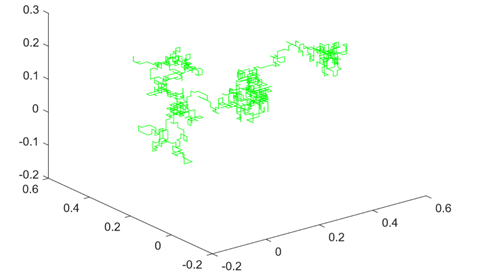



Global properties of the system, including sample to sample variability, are then derived from the comparison of such individual trajectories across samples, as we will see in more details in the next section. 

On the figure above, we see the trajectory of one molecule, often referred to as a <b> random walk </b> since the molecule appears to randomly change direction every now and them. Similar trajectories of <b> all </b> of the model objects are also provided by a simulation of the RD-CME. In this sense, the CME formalism (including ST/RD-CME) is a fully stochastic formalism, which an exact description of a Markov chain, and is almost exact in the case of non-Markovian processes provided we used the right level of “detail” in the description, as discussed above. 

But the downside is that it is generally impossible to solve analytically, with the exception of some simple CMEs as we’ll see in the next section. Even for numerical resolution, the computational cost of a ST/RD-CME system is often huge even with a relatively small number of objects. Hence, it can be useful to sometimes use, in parallel, a <b> less fully stochastic formulation </b> that still account for some random noise, but is more tractable analytically and less computationally expensive. 






 







### 4) Constructing stochastic PDEs: the Fokker-Planck and Langevin approaches

Let’s consider first a simple CME (no space-dependence). Symbolically, any CME can be written as:

$$\frac{\partial P(s,t)}{\partial t} = \sum_{\mu =1}^{M} w_{\mu}(s+\delta_{\mu})*P(s+\delta_{\mu},t) - \sum_{\mu =1}^{M} w_{\mu}(s)*P(s,t) $$

where $s$ is the state (e.g., the ensemble of all the copy numbers $n_k$ of molecular species $S_k$ that make the model),  $M$ is the number of elementary biomolecular reactions indexed by some index $\mu$, and the reaction $R_{\mu}$ takes the system from the state $ s+\delta_{\mu}$ into the state $s$ (positive terms) with a rate $w$ that must be computed in the “original” state $ s+\delta_{\mu}$, while the same reaction $R_{\mu}$ can also force the system to leave the state $s$ towards other states, with the reaction rate $w$ that must be, then, computed in the state $s$. The notation $\delta_{\mu}$ just indicates the difference between the state $s$ and the other state that can lead to $s$ if the reaction $R_{\mu}$ is completed. For instance, if we have 5 molecular species $(A,B,C,D,E)$ and the reaction $R_3$ (the third reaction in our “list” of reactions) is $A+B \rightarrow D$, then $s=\{n_A,n_B,n_C,n_D,n_E\}$ and $\delta_{3}=\{1,1,0,-1,0\}$; nothing complicated, just a notation. 

In the situation where the number of molecules is quite large than the number changes associated  with each elementary reaction (typically, $\pm 1-2$ molecules), then this CME can be approximated by a PDE (continuous), that is called a  <b> Fokker-Planck (FP) equation </b>. There is in principle one FP equation per problem, this is a generic denomination. This regime is an intermediate regime, between the case of very large number of molecules where a fully continuous framework might be adapted (ODEs/PDEs acting on concentrations), and the case of very low number of molecules where the fully stochastic CME framework is more adapted. To obtain the FP equation, we formulate mathematically the fact that the number of molecules in the system (state $s$) is large compared to the changes associated  with each elementary reaction $\delta_{\mu}$:

$$s>>\delta_{\mu}$$

and we can perform a Taylor expansion of the CME (named, in this particular context, a Kramers–Moyal expansion) which we stop at the second order in $\delta_{\mu}$:



$$\frac{\partial P(s,t)}{\partial t} = \sum_{\mu =1}^{M} \displaystyle \Bigg[ \sum_{i=1}^N \delta_{\mu \,i} *\frac{\partial [w_{\mu}(s)*P(s,t)]}{\partial s_i} + \frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \delta_{\mu \,i}*\delta_{\mu \,j} *\frac{\partial^2 [w_{\mu}(s)*P(s,t)]}{\partial s_i \partial s_j} \Bigg]$$

where $N$ is the total number of species. What does this equation mean? In the CME $\frac{\partial P(s,t)}{\partial t} = \sum_{\mu =1}^{M} w_{\mu}(s+\delta_{\mu})*P(s+\delta_{\mu},t) - \sum_{\mu =1}^{M} w_{\mu}(s)*P(s,t) $, if the variation of copy number of the specie $i$ (i.e., the component $i$ of the “vector” $\delta_{\mu$}$, which we denote $\delta_{\mu \,i}$) at each reaction $R_{\mu}$ is small compared to the typical copy number $s_i$ of this specie, then the “+” and “-“ terms of the CME are very close. Their difference is the sum of all the tiny differences associated with the small changes in copy number of all species (hence the sums from 1 to N), hence the sum of all the partial derivatives of the function $(w*P)(s,t)$ with respect to all the “components” of the state $s$ (the copy number for all species). This gives the first term. The second term is the “second order” equivalent, because in principle elementary reactions <b> can involve two species simultaneously </b> and thus second order derivatives of the function $(w*P)(s,t)$ with respect to such “pairs” of species become relevant. 

The first term of the Fokker-Planck equation can be viewed as a <b> transport term </b> under the influence of which the mean of the state variables is readjusted, while the second term is similar to a <b> diffusive term </b> that increases the stochastic spread of the variables (their standard deviation). 


But beyond the meaning of each term, the Fokker Planck equation means that <b> it is possible to replace full stochastic dynamics by a deterministic equation (PDE) for the probability to find the system in a given state at a given time </b>. 


This approach comes from a Taylor expansion of the CME, and hence is valid when the system modification associated with each individual reaction is a “perturbation” of the latter, i.e. it is valid in the limit where the system is large, or equivalently when the number of molecules/objects of each type is not too small. One advantage of this development is that <b> we don’t have to be in the situation where the FP approximation is valid for all variables </b>. Indeed, in the case where all the stochastic biological variables do no satisfy the condition of validity of the FP approximation, we can split the biological variables in two groups. Let’s denote $Y$ the variables for which the FP approximation is valid, and $X$ the variables for which it is not. 
Hence the state of the system is $s=(x,y)$, i.e. an  ensemble of values of the $X$-type variables and of the $Y$-type variables, and write the CME as:

$$\frac{\partial P(x,y,t)}{\partial t} = \sum_{\mu =1}^{M} w_{\mu}(x+\delta_{\mu},y+\eta_{\mu})*P(x+\delta_{\mu},y+\eta_{\mu},t) - \sum_{\mu =1}^{M} w_{\mu}(x,y)*P(x,y,t) $$

where the coefficients that characterize the change of state upon elementary reaction (i.e., the stoichiometric coefficients) that affect $X$-type variables and $Y$-type variables have been distinguished as $\delta_{\mu}$ and $\eta_{\mu}$  respectively. We can add and remove the same quantity $\sum_{\mu =1}^{M} w_{\mu}(x+\delta_{\mu},y)*P(x+\delta_{\mu},y,t)$ in the right hand side, to make explicit that we will treat the rates associated with changes in the $X$-type and $Y$-type variables distinctively: 

$$\frac{\partial P(s,t)}{\partial t} = \sum_{\mu =1}^{M} \displaystyle \Bigg[ w_{\mu}(x+\delta_{\mu},y+\eta_{\mu})*P(x+\delta_{\mu},y+\eta_{\mu},t) - w_{\mu}(x+\delta_{\mu},y)*P(x+\delta_{\mu},y,t) \Bigg] + \sum_{\mu =1}^{M} \displaystyle \Bigg[w_{\mu}(x+\delta_{\mu},y)*P(x+\delta_{\mu},y,t)- w_{\mu}(x,y)*P(x,y,t) \Bigg].$$

Since the first term represent changes in the $Y$-type variables only (the $X$-type variables being taken at their “initial value” $x+\delta_{\mu}$ before the reaction $R_{\mu}$ takes place), then we can perform a Kramers–Moyal expansion with respect to the $Y$-type variables and write a Fokker-Planck equation for this first bracket. Doing so reduces the number of variables  for which the fully stochastic CME will have to be solved ($X$-type only). We sometimes refer to such an equation as a <b> Hybrid FP-CME </b>. The expression above is a bit formal, however in practice it is easier to figure out which terms in a CME shall be treated with the FP approximation and which should not. In practice, CME terms that express differences in the rate of entering a given state and the rate of leaving it through the <b> same molecular reaction </b> are <b> naturally </b> of the type $ w_{\mu}(s+\delta_{\mu})*P(s+\delta_{\mu},t) - w_{\mu}(s)*P(s,t) $, and provided that the molecular count changes are small compared to the total population, these terms might be Kramers–Moyal expanded and the FP truncation to second order shall be used. For instance, as seen above with the stochastic gene expression model, the case of a single molecule degradation reaction $M \rightarrow \emptyset$ generates two terms in the CME for the state with m molecules, one that projects the system into this state from the state $s+\delta_{\mu} = "m+1" \, molecules$ and one that projects the system out of this state (towards the state with $m-1$ molecules). Both terms are very similar, and in the case where $m$ is large, the difference becomes very small compared to the value of each term and the FP truncation of the Kramers–Moyal expansion is justified. Let's train a bit with an illustrative exercise. 


<b> Exercise 4: </b> We have previously derived the CMEs for a simple model of stochastic gene expression describing the promoter state (0: promoter is “off” and mRNAs are not produced; 1: promoter in “on” and mRNAs can be produced). In the CMEs below, $m$ is the possible values for the number of mRNAs and $n$ of protein at a time $t$:

$$ \frac{\partial P_{m,n,0}(t)}{\partial t} = \displaystyle \Bigg(k_{off}+n*k_{inact} \Bigg)* P_{m,n,1}(t)- k_{on} * P_{m,n,0}(t)+\nu_1*m* \displaystyle \Bigg( P_{m,n-1,0}(t)-P_{m,n,0}(t) \Bigg) + d_0* \displaystyle \Bigg( (m+1)*P_{m+1,n,0}(t)-m*P_{m,n,0}(t) \Bigg)+ d_1* \displaystyle \Bigg( (n+1)*P_{m,n+1,0}(t)-n*P_{m,n,0}(t) \Bigg),$$

$$ \frac{\partial P_{m,n,1}(t)}{\partial t} = - \displaystyle \Bigg(k_{off}+n*k_{inact} \Bigg) * P_{m,n,1}(t)+ k_{on} * P_{m,n,0}(t)+ \nu_0* \displaystyle \Bigg( P_{m-1,n,1}(t)-P_{m,n,1}(t) \Bigg)+ \nu_1*m* \displaystyle \Bigg( P_{m,n-1,1}(t)-P_{m,n,1}(t) \Bigg) + d_0* \displaystyle \Bigg( (m+1)*P_{m+1,n,1}(t)-m*P_{m,n,1}(t) \Bigg)+ d_1* \displaystyle \Bigg( (n+1)*P_{m,n+1,1}(t)-n*P_{m,n,1}(t) \Bigg)$$

We assume that the system is large, so that the typical number of proteins and mRNAs is a few dozens. Can we apply the Fokker-Plank approximation? If yes, can we apply it on all stochastic variables? Separate the variables in variables for which the FP approximation can in principle be used, and write the final hybrid FP-CMEs equations. 



In [75]:
#%run solutionExercise4.py

$$ \frac{\partial P_{s,t}(t)}{\partial t} = - \frac{\partial }{\partial s} \displaystyle \Bigg[ D_1(s) * P(s,t) \Bigg] +\frac{\partial }{\partial s} \displaystyle \Bigg[ D_2(s) \frac{\partial }{\partial s}P(s,t) \Bigg] $$

As we could see above, the Fokker Plank equation that describes a stochastic process can be written in terms of a  <b> drift term </b> $D_1$, and a <b> diffusion term </b> $D_2$ taking the symbolic form:

$$ \frac{\partial P_{s,t}(t)}{\partial t} = - \frac{\partial }{\partial s} \displaystyle \Bigg[ D_1(s) * P(s,t) \Bigg] +\frac{\partial }{\partial s} \displaystyle \Bigg[ D_2(s) \frac{\partial }{\partial s}P(s,t) \Bigg] .$$

By “symbolically”, it is meant that if the state of the system is characterized by several FP-compatible stochastic variables such like the number of mRNAs m and of proteins n in exercise 4, then the probability $P(s,t)$ depends on all these variables $s_1,s_2 …$ and the FP equation includes drift terms for all these variables, and the diffusion terms for all the pairs of variables. Therefore, within the Fokker-Planck continuous framework, the dynamical response of the stochastic system to a perturbation is <b> equivalent to the response of a diffusive system under a drift flow </b>.  It can be demonstrated that the drift term is related to the <b> mean state </b> defined by the expectation value of all the stochastic variables it comprises, and that the diffusion term is a readout of the <b> fluctuations around the mean </b>. The FP dynamics therefore tend to homogenize fluctuations across the variables, damping fluctuations of variables that “over fluctuate”. 

In addition, as it is the case in exercise 4, the drift and diffusion terms generally depend on the state itself and on the microscopic parameters on which the elementary stochastic reactions depend. Hence, <b> modeling a stochastic experimental system with a continuous FP equation </b> provides a way to <b> probe the underlying stochastic dynamics </b> (for instance detect the kinetics of fluctuations damping, or of mean state drifting…), when we don’t have access to such “microscopic” dynamics. 

This approach can be used to detect alterations of such underlying stochastic dynamics, and therefore to identify disease states based on biological measurements that are inherently variable from time to time and sample to sample. A great example of such a use of a “global” FP model is provided in https://doi.org/10.1007/s10867-006-9006-z . The authors of these studies measured heartbeat time-courses in healthy patients (Fig. 1 below) and patients with congestive heart failure (CHF, Fig. 2 below), during the day and at night. They measured the inter-beat timelag $r$ over time (>20000 measurements). $r$ is inherently a stochastic variable provided that measurements have a high enough time resolution (see Figs1-2, from https://doi.org/10.1007/s10867-006-9006-z). They converted the measured inter-beat values $r_i$ to the <b> returns </b> $x_i=\ln (r_{i+1}/r_i)$:

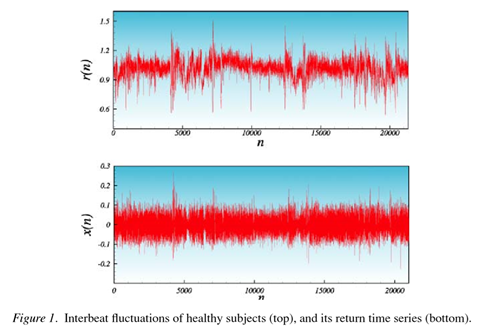



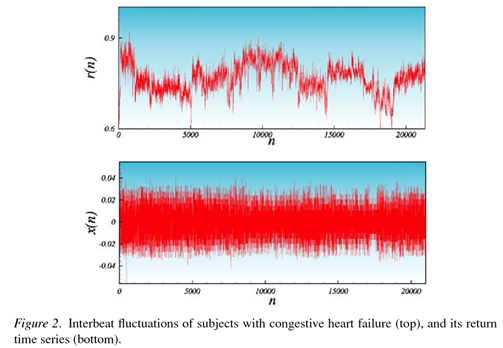

They modeled the observed inter-beat distribution (specifically, the distributions of the returns $x_i$) with a Fokker Planck equation. The authors computed the drift and diffusion coefficients that fit the time-series data the best in the FP framework, across the two cohorts of healthy (blue, red) and sick (green) patients. The obtained very different patterns for $D_1(x)$ (see Figure below) and $D_2(x)$ ($x$ here denotes the returns and is the stochastic variable):




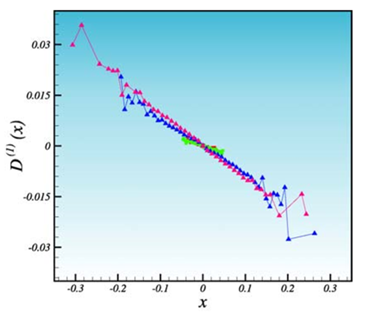

In this example, the difference in the timeseries of inter-beat times between healthy and sick patients was noticeable just by looking at the time series, but that is not always the case and the parametrization of a stochastic time-series with a global Fokker Planck equation provides a top-down approach to analyze stochastic data. It is noteworthy that, in order for this approach to be suitable, the condition that the stochastic process in Markovian (at least, in appearance!) shall be verified. More details are provided by the authors on how to tick this box in practice. 


In summary, the Fokker Planck approximation allows either to simplify the CME leading to possibly solvable PDEs, or to approach experimental stochastic time-series in a parametric way to get insight on the underlying microscopic stochastic parameters. 

A frequent situation in modeling is the situation where a deterministic approach (ODEs/PDEs) has been used already to describe the model, solutions have been found and insight has been gained on the dynamical behavior of the model in the continuum limit. Yet, we want to analyze the stochastic regime of the same model  to be able to analyze sample-to-sample variability in experiments. 

In this situation, it is possible to just <b> add a random noise term “ad-hoc” </b>  in the ODE/PDE, transforming then those deterministic equations in stochastic equation. This approach was historically used by Langevin to describe (random) Brownian motion (and diffusion) from the (deterministic) Newton equations of motion of individual objects. The idea is simple: if we have a model described by the deterministic PDE

$$\frac{\partial Y}{\partial t}= A(t,x,Y) * \frac{\partial^2 Y}{\partial x^2} + B(t,x,Y)* \frac{\partial Y}{\partial x} + C(t,x,Y)$$

which we write with only one space coordinate $x$ for simplicity (but without loss of generality), and the functions A, B, C depend on time, $x$ and possibly the value of $Y$, the stochastic formulation of the same model shall be written: 

$$\frac{\partial Y}{\partial t}= A(t,x,Y) * \frac{\partial^2 Y}{\partial x^2} + B(t,x,Y)* \frac{\partial Y}{\partial x} + C(t,x,Y) + \eta(t,x)$$

where $\eta(t,x)$ is called the <b> (random) noise term </b>. It is a random variable, with some particular statistical properties that we will discuss further below. Hence $Y$ becomes a random variable as well. This equation is called a <b> Langevin equation, LE </b>. As for FPEs, it is a generic term, and there are as many LE’s than models (each LE can also be converted into an equivalent FPE: those are just two mathematically different formulations of the same processes, and the range of validity of both approaches are the same).

This way of implementing stochastic noise in ODEs/PDEs is based on solid theoretical foundations, and the entire derivation is beyond the scope of this course (see https://arxiv.org/abs/1104.4524 - look at how you’re now reading theoretical (bio)physics papers). Yet, looking at the main steps of this derivation allows to get insight on the statistical properties of the noise term $\eta$. 

Let’s take a step back and consider the CME: 

$$\frac{\partial P(s,t)}{\partial t} = \sum_{\mu =1}^{M} w_{\mu}(s+\delta_{\mu})*P(s+\delta_{\mu},t) - \sum_{\mu =1}^{M} w_{\mu}(s)*P(s,t) $$ 

where we remember that the state $s$ and the state variation upon the chemical reaction $R_{\mu}$, $\delta_{\mu}$ represent in the general case multiple stochastic variables, hence these quantities are vectors. Assume we are trying to infer, from the CME, differential equations that describe the time-evolution of the <b> statistically averaged values of the stochastic variables </b> $S_i$ (their expectation value $<S_i>$).

If we multiply this equation by $s_i$, the number of molecules of specie $S_i$, and sum over all possible values of $s_i$ but also all the other $s_j$ (or equivalently, “sum over all the values of $s$”) , the left hand side becomes 

$$\frac{\partial <S_i>}{\partial t}$$

and the right hand side becomes 

$$\sum_{\mu =1}^{M}  \displaystyle \Bigg[ \sum_{all \, states \, s} s_i*w_{\mu}(s+\delta_{\mu})*P(s+\delta_{\mu},t) - \sum_{all \, states \, s} s_i*w_{\mu}(s)*P(s,t) \Bigg].$$

By definition of the statistical averaging over all possible states, 

$$ \sum_{all \, states \, s} s_i*w_{\mu}(s)*P(s,t) = <S_i*w(S)>$$


Provided that the marginal probability $P(s,t)$ converges to 0 for infinitely large copy number of any species (which is achieved in biological systems), the first sum over the states $s$ can be rewritten as a sum over states $s’=s+\delta_{\mu}$ and we get 

$$\sum_{all \, states \, s} s_i*w_{\mu}(s+\delta_{\mu})*P(s+\delta_{\mu},t) =\sum_{all \, states \, s’} (s’_i-\delta_{\mu,i})*w_{\mu}(s’)*P(s’,t) = < (S_i-\delta_{\mu,i})*w(S)>$$

and therefore, combining left and right sides: 

$$\frac{\partial <S_i>}{\partial t} = \sum_{\mu =1}^{M}  \displaystyle \Bigg[  < (S_i-\delta_{\mu,i})*w(S)> - < (S_i)*w(S)> \Bigg] = - \sum_{\mu =1}^{M}  \displaystyle \Bigg[ < \delta_{\mu,i}*w(S)> \Bigg]$$

This equation is in general of little use, since, <b> unless </b> $w$ <b> is a linear function of the </b> $S_i$, generally 

$$< \delta_{\mu,i}*w(S)> \neq \delta_{\mu,i}*w(<S>)$$

and we cannot write ODEs for the average values of the stochastic variables $S_i$ from this equation. Note, still, that if $w$ is linear this is possible: this happens, sometimes, and in this case what follows is not required. But in the general case where the reaction rates $w$ depend in a non-linear way on the copy numbers of the different molecular species (Michaelis Menten, Logistic growth, bi-trimolecular complexes equilibrium, positive feedback in gene expression…), we have to use particular tricks to process this term. 

To a Langevin equation, we need to consider the statistical average of the state $S$ at two different instants of time separated by a short time interval $\tau$, and to find a relation between $S(t+\tau)$ and $S(t)$. The idea is the integrate the stochastic dynamics during $\tau$, which is chosen: 1) <b> small enough </b> so that the change in the state between current time t and t+dt is relatively small $S(t+\tau)\approx S(t)$, in which case the rates $w_{\mu}(S)$ do not significantly change during the entire time interval; and 2) <b> large  enough </b> so that we expect many occurrence of each reactions between $t$ and $t+\tau$, in other words $w_{\mu}(S)*\tau >>1$. 

We account for stochastic fluctuations by assuming that the number of reactions of each type that happens between $t$ and $t+dt$ is a random variable $K_{\mu}(S,\tau)$. For any realization of these random variables $K_{\mu}(S,\tau)$, the state $S_i(t+\tau)$ for the i-th random variable can be calculated from $S_i(t)$ using the stoichiometric coefficients of the reactions, and all the $K_{\mu}$. 

In the case where $\tau$ is <b> large  enough </b> so that we expect many occurrence of each reactions between t and t+dt, the random variables $K_{\mu}(S,\tau)$ follow Gaussian distributions, as a consequence of the central limit theorem in statistics. The mean and variance of the random variables $ K_{\mu}$ is $ w_{\mu}(S(t))*\tau$ and we finally obtain:

$$S_i(t+\tau)-S_i(t)= \sum_{\mu =1}^{M}  (-\delta_{\mu,i})*w(S(t))*\tau + \sum_{\mu =1}^{M}  (-\delta_{\mu,i})*\sqrt{w(S(t))*\tau}*N_{\mu} $$

where $N_{\mu}$ are normally distributed random variables (with mean $0$ and variance $1$. This equation resembles a lot the deterministic balance equation for $S_i$ in the absence of fluctuations 

$$ S_i(t+dt)-S_i(t) = - \sum_{\mu =1}^{M}  \delta_{\mu,i}*w(S) * dt$$

if we identify the mesoscopic time increment $\tau$ with the tiny time increment $dt$ of the balance equation. 

Replacing the notation $\tau$ by a more standard one, $dt$, the stochastic equation for the statistical average of the stochastic variable $S_i$ becomes: 

$$S_i(t+dt)-S_i(t)= dS_i = \displaystyle \Bigg[ \sum_{\mu =1}^{M}  (-\delta_{\mu,i})*w(S(t)) \Bigg]*dt  + \displaystyle \Bigg[ \sum_{\mu =1}^{M}  (-\delta_{\mu,i})*\sqrt{w(S(t))} \Bigg] * dW_{\mu}  $$
 
where $W_{\mu}$ are random variables that satisfy the identity: 

$$ dW_{\mu} = W_{\mu}(t+dt)- W_{\mu}(t)= \sqrt{dt}*N_{\mu}.$$

We have just rewritten $\sqrt{dt}*N_{\mu}$ as “$dW_{\mu}$”. It sounds artificial, but it’s not. Random variables that satisfy such an evolution in time are called <b> Wiener processes </b> and represent the limit of (random) Brownian motion at large times. In other words, because we have chosen to look at the state of the system at a time that is considered large with respect to the timescales corresponding to the rates $w_{\mu}$ ($dt=\tau >>1/ w_{\mu}(S)$). The system has performed a random walk through the chemical space between $t$ and $t+dt$ (random numbers of each reaction), and this random walk deviates the system from its deterministic trajectory described by the ODE $dS_i =  \sum_{\mu =1}^{M}  (-\delta_{\mu,i})*w(S(t)) *dt$.  The second term quantifies <b> “how far” the (chemical) random walk is expected to bring the system away from its deterministic trajectory </b> during the time $dt$. 
Anyways, the equation obtained is called the <b> Langevin equation </b> of our model, and is a particular instance of </b> stochastic differential equation </b>. All the “stochasticity” is included in the second term: in the absence of Wiener processes, the equation for $S_i$ is exactly the ODE we would get for the deterministic formulation of the model. The Langevin equation is pretty convenient for numerical simulations, as it represents a natural Forward Euler scheme for integration, with the noticeable difference that at each time step, a random correction that depends on the normally distributed random variables $N_{\mu}$,  is provided to all integrated variables. This algorithm will be detailed below.  

Therefore we have done what we intended to do: replace a deterministic ODE by the same ODE + a stochastic term $\eta(t)$. This derivation provides insight on how this “noise term” must look like, in order to be in good agreement with the microscopic theory. In particular, the noise term has to sum the noise of all the elementary reactions, each of which scales with the <b> square root of the reaction rate </b> and the <b> square root of the time increment </b>, and has to be normally distributed. 

Importantly, it also has to be a <b> stationary process </b>, meaning that its statistical properties like mean and variance do not depend on time, and that the noise (conditional) probability distribution $P(\eta(t)=x|\eta(t_0)=x_0)$ can be translated in time: $P(\eta(t)=x|\eta(t_0)=x_0)= P(\eta(t-t_0)=x|\eta(0)=x_0)$. All these properties constrain what this noise term can be. 

In practice, for  interacting biochemical systems where relevant macroscopic time scales and microscopic reaction rates allow the existence of a mesoscopic range $\tau$, the Langevin equation described above with the noise term we have derived shall be used. For other types of models, that include different objects which are not interacting biomolecules, the amplitude of the noise term might be different. However the scaling with time, statistical independence of all the $N_{\mu}$ at different times, and normal distribution of the noise are generally assumed.  

CME, FPEs, Hybrid FP-CMEs and Langevin equations are the most frequent mathematical approaches used to described stochastic dynamics in biological systems. Other approaches might be used, some of them are reviewed in (https://doi.org/10.1002/wsbm.78).


### 5) Resolution of stochastic equations: stationary state analysis and other basic approaches, solvable problems

To tackle the resolution of stochastic equations, the naïve way to approach the problem is naturally to search for a <b> steady state </b>, as we did for deterministic ODEs/PDEs. However, because of the molecular noise, in stochastic dynamics <b> nothing is never static </b> , and all stochastic variables are varying in time. Hence, we cannot assume $\frac{\partial Y}{\partial t} = 0$ for any stochastic variables. However, it is possible to do so on the <b> statistical means and variance </b> of the stochastic variables. Indeed, even for a stochastic variable, the identities

$$\frac{\partial <Y>}{\partial t} = 0$$

and

$$\frac{\partial \sigma^2(Y)}{\partial t} = 0$$

do make sense: they mean that the system has reached a state in which <b> the stochastic variable </b> $Y$ <b> fluctuates around a temporally stable (statistical) mean, with temporally stable amplitude of fluctuations </b>. This state of the stochastic system where all variables behave this way is called a <b> Stationary State </b>. 

Unlike in deterministic modeling, where the steady state is defined unambiguously by $\frac{\partial }{\partial t} = 0$, in stochastic modeling there are different ways to define the stationary state. Stricto sensu, a stochastic process (i.e., time-dependent stochastic variable $Y$) is stationary if the joint cumulative distribution $P(Y<y_1 \,at\,time\,t_1 \, and \, Y<y_2 \,at\,time\,t_2 \, and \, … )$ for any values and number of time points can be translated in time, $P(Y<y_1 \,at\,time\,t_1 \, and \, Y<y_2 \,at\,time\,t_2 \, and \, … )=P(Y<y_1 \,at\,time\,t_1+\tau \, and \, Y<y_2 \,at\,time\,t_2+\tau \, and \, … )$$. This strong constraint implies that mean and variance are constant over time. But it is difficult to handle mathematically, and barely useful in biological systems modeling where we are mostly interested in mean and variance, the lowest order moments of a distribution. 

Hence, we will prefer using the definition of the stationary state in the <b> weak sense </b> where we require only 3 properties to be fulfiled: 
-  The expected value (statistical mean) of all variables $Y$ is constant in time: $<Y>(t) = E[Y(t)] = <Y>(t+\tau)$ for any $\tau$; hence, $\frac{\partial <Y>}{\partial t}=0$
- The expected value of the variables $Y^2$ is not infinite;
- The autocorrelation function at two time points $A_Y=E[(Y(t_1)- <Y>(t_1))* (Y(t_2)- <Y>(t_2))]$ is only a function of the time shift $t_1-t_2$: time correlations of the variables are conserved over time. A consequence is that the variance, which is the autocorrelation function at $t_1=t_2$, is invariant in time and thus, as for the expected value, $\frac{\partial \sigma^2(Y)}{\partial t}=0$


These properties can help to simplify the Fokker Planck and Langevin equations, which are formulated in a way where the time-dependent statistical means of the biological variables is explicit. For instance, in the Langevin equation, the weak sense stationary (WSS) condition imposes:

$$dS_i=S_i(d+dt)-S_i(t)=0$$

because in the Langevin formalism, $S_i$ is the expected value of the variable $S_i$. Hence, the WSS yields:


$$ \displaystyle \Bigg[ \sum_{\mu =1}^{M}  (-\delta_{\mu,i})*w(S) \Bigg]*dt  + \displaystyle \Bigg[ \sum_{\mu =1}^{M}  (-\delta_{\mu,i})*\sqrt{w(S)} \Bigg] * dW_{\mu}  = 0$$

from which we can express the $ w(S)$, and depending on the models, $S$, as a function of Wiener processes. 

Likewise, the Fokker Planck equation being formulated in “continuous time”, and including only first and second order terms of the Kramers-Moyal expansion (i.e., mean and variance of the stochastic variables in a kind of cryptic way), all the terms of a FPE are functions of those means and variance, for which the stationary condition is indeed $\frac{\partial }{\partial t}=0$. Since the Langevin and Fokker Planck formalisms can be linked, the FP formalism is convenient to implement the resolution of the stationary state. 

Because this situation yield PDEs, we will refer the reader to the PDE section of the notebook “Section 2 - Animating the structure”. 

Rather, we will focus on the resolution of stochastic problems where the Langevin or FP approaches cannot be used, and when the CME has to be solved directly. This is generally speaking too difficult to do, even for systems with rather low complexity. However, for simple systems the CME can be solved, and therefore this resolution can provide insight on how small “submodules” of a more complex model handle the biological noise. 

In the introductory part, for stochastic variables that can take integer values (like for instance, the number of biomolecules of a given type), we have introduced the notion of <b> generating function </b>. If $P_n$ is the probability that the variable $N$ takes the (integer) value $n$, then the generating function is defined as: 

$$ G_(x)= \sum_{n=0}^{\infty} (x^n*P_n).$$

If we have a system with 2 such variables $N$ and $M$ that can take both integer values, the state of the system is defined by a pair of integers $(n,m)$, the state probability is denoted $P_{n,m}$ and we will define the generating function as: 

$$ G_(x,y)= \sum_{n=0}^{\infty}\sum_{m=0}^{\infty} (x^n y^m * P_{n,m})$$

which we can shorten as (shorter notation but still a double sum)

$$ G_(x,y)= \sum_{n,m=0}^{\infty} (x^n y^m * P_{n,m}).$$


If there are three variables that can take integer values $n$,$m$,and $p$, the state of the system is defined by a triplet $(n,m,p)$, the state probability is denoted $P_{n,m,p}$ and the generating function is defined as the sum over all triplets: 


$$ G_(x,y,z)= \sum_{n,m,p=0}^{\infty} (x^n y^m z^p * P_{n,m,p}),$$

and so on and so forth. If there are a lot of stochastic variables, the expression of the generating function may become to complicated, but with a handful of variables we can still handle it. 

Why is this convenient at all? As stated in the introduction, the generating function contains all the information of the joint probability distribution, hence it encloses the full stochasticity of the model. It is not a simplification, unlike the Langevin/Fokker Plank approaches. In addition, the CME usually takes the form

$$\frac{\partial P_{n,m,p…}(t)}{\partial t} = F(n,m,p,…,parameters, P_{n\pm 1,m\pm1 ,p\pm1…}(t))$$

where the function $F$ sums up all the elementary reaction processes with the adequate rates. $F$ is always <b> linear </b> with respect to the probabilities (not necessarily with respect to the indices, or the parameters… but this is not a problem. Such a CME can be multiplied by $ x^n y^m z^p…$ then summed over all the multiplets of indices (all the states of the system), and we get:

$$\frac{\partial G(x,y,z… t)}{\partial t} = \sum_{n,m,p=0}^{\infty} \displaystyle \Bigg(x^n y^m z^p * F(n,m,p,…,parameters, P_{n\pm 1,m\pm1 ,p\pm1…}(t)) \Bigg).$$

Again, why is this convenient at all? Because the function $F$ is <b> linear </b> with respect to the probabilities, <b> ALL </b> the terms on the right hand side will be of the type: 

$$ parameter * \sum_{n,m,p=0}^{\infty} x^n y^m z^p * n^{\alpha_n}* m^{\alpha_m}* p^{\alpha_p}* …P_{n\pm 1,m\pm1 ,p\pm1…}(t)) $$

where the powers $\alpha_{n,m,p}$ reflect the stoichiometries of the elementary reactions, and are typically 0, 1 or 2. Never more, because elementary processes never involve more than 2 reactants. Those sums can be computed <b> easily </b> in function of the generating function and of its derivatives with respect to $x$, $y$, …$z$... leading to a <b> first or second order PDE involving the generating function and its derivatives </b>. Thus, again, it is possible to transform the stochastic problem into a deterministic PDE by using the generating function formalism

Let’s compute some typical sums that are often encountered in the generating function formalism:


$$ \sum_{n,m,p=0}^{\infty} x^n y^m z^p * P_{n,m,p…}(t) = G(x,y,z…,t) $$

by definition. 

$$ \sum_{n,m,p=0}^{\infty} x^n y^m z^p * P_{n+1,m,p…}(t) = \frac{1}{x} *\sum_{n,m,p=0}^{\infty} x^{n+1} y^m z^p * P_{n+1,m,p…}(t) = \frac{1}{x} *\sum_{n’=1,m,p=0}^{\infty} x^{n’} y^m z^p * P_{n’,m,p…}(t)  $$
using a translation in the summation index, $n’=n+1$. In the sum, we identify the generating function, minus the first term of the sum over index $n$: $\sum_{m,p=0}^{\infty} x^0 y^m z^p * P_{0,m,p…}(t) $. T-his term, the first one of the sum over $n$, is the <b> only term in G that does not vanish in </b> $x=0$:

$$\sum_{m,p=0}^{\infty} x^0 y^m z^p * P_{0,m,p…}(t)  = G(x=0,y,z,t).$$

Hence, 

$$ \sum_{n,m,p=0}^{\infty} x^n y^m z^p * P_{n+1,m,p…}(t) = \frac{1}{x} *[G(x,y,z,t) - G(0,y,z,t].  $$

Likewise, 

$$ \sum_{n,m,p=0}^{\infty} x^n y^m z^p * P_{n-1,m,p…}(t) =  \sum_{n=1,m,p=0}^{\infty} x^n y^m z^p * P_{n-1,m,p…}(t)$$

because $ P_{-1,m,p…}(t) = 0$ since molecule numbers shall be positive. Hence, the term $n=0$ of the sum is always 0 and we can start the sum at $n=1$ without changing anything. Using $n’=n-1$, hence $n=n’+1$, we have: 

$$ \sum_{n,m,p=0}^{\infty} x^n y^m z^p * P_{n-1,m,p…}(t) =  \sum_{n’,m,p=0}^{\infty} x^{n’+1} y^m z^p * P_{n’,m,p…}(t) =x* \sum_{n’,m,p=0}^{\infty} x^{n’} y^m z^p * P_{n’,m,p…}(t) = x*G(x,y,z,t) $$

Thus, in summary, <b> a - 1 increment in of the probability indices is equivalent to a multiplication by the corresponding variable in the generating function </b> (here, $P(n-1…) \rightarrow x*G(x,…)$. In contrast,  <b> a + 1 increment in of the probability indices is equivalent to a division by the corresponding variable in the generating function </b>, with an additional correction of the 0-point value of the function (here, $P(n+1…) \rightarrow 1/x*[G(x,…)-G(0,…)]$.

This also applies to translations of the $m$, $p$... indexes, and multiplications/divisions will be with respect to $y$, $z$ … .

The last category of terms will be of the kind: 

$$ \sum_{n,m,p=0}^{\infty} x^n y^m z^p * n * P_{n,m,p…}(t). $$

Because of the presence of the factor $n$, the terms $n=0$ of the sum all vanish, and thus we can start the sum at $n=1$:

$$ \sum_{n,m,p=0}^{\infty} x^n y^m z^p * n * P_{n,m,p…}(t) = x*\sum_{n=1,m,p=0}^{\infty} n*x^{n-1} y^m z^p * P_{n,m,p…}(t) = x* \frac{\partial}{\partial x} \displaystyle \Bigg[   \sum_{n=0,m,p=0}^{\infty} x^n y^m z^p * P_{n,m,p…}(t)  \Bigg] = x * \frac{\partial}{\partial x} G(x,y,z,t)$$

Hence, <b> multiplication by an index is equivalent to a derivative of the generating function with respect to the corresponding variable </b>, followed by a multiplication by this variable. 
Following these “rules” of calculation, the CME can be re-expressed in terms of the generating function, its variables and derivatives. The <b> order </b> of the different operations has to be considered carefully. For instance, we will do the translations before the derivations. For instance, 

$$ \sum_{n,m,p=0}^{\infty} x^n y^m z^p * (m+1) * P_{n,m+1,p…}(t) = \frac{\partial}{\partial y}\sum_{n,m,p=0}^{\infty} x^n y^{m+1} z^p  * P_{n,m+1,p…}(t) = \frac{\partial}{\partial y} \displaystyle \Bigg[ G(x,y,z,t) - G(x,0,z,t)\Bigg] = \frac{\partial}{\partial y} G(x,y,z,t)  $$

<b> Exercise 5: </b> We consider again the elementary gene expression model, in the case where the promoter is constitutively “on”.  The states of the system are therefore fully characterized by a pair of integers, the number $m$ of mRNA molecules and the number $n$ of proteins, and the joint distribution (probability to get at the same time $m$ mRNA and $n$ proteins) is $P_{m,n}(t)$. As derived in a previous section of this notebook, this probability distribution then satisfies the CME: 

$$\frac{\partial P_{m,n}(t)}{\partial t}= \nu_0* \displaystyle \Bigg( P_{m-1,n}(t)-P_{m,n}(t) \Bigg)+ \nu_1*m* \displaystyle \Bigg( P_{m,n-1}(t)-P_{m,n}(t) \Bigg) + d_0* \displaystyle \Bigg( (m+1)*P_{m+1,n}(t)-m*P_{m,n}(t) \Bigg)+ d_1* \displaystyle \Bigg( (n+1)*P_{m,n+1}(t)-n*P_{m,n}(t) \Bigg).$$

Define the convenient form for the generating function $G$ associated with $ P_{m,n}(t)$. Derive the PDE satisfied by $G$. In the case where the promoter is also a stochastic variable, would you still define a unique generating function? If not, how many functions would you define? What would be the PDEs satisfied by those functions, with and without negative feedback on promoter activity?




In [76]:
#%run solutionExercise5.py

<b> Exercise 6: </b> We consider the reversible stochastic binding reaction where two proteins A and B form a complex AB $A+B \leftrightarrow AB $ with a  binding (“on”) rate $k_{on}$ per molecule A per molecule B per unit time, and a dissociation (“off”) rate k_{off} per complex per unit time. Proteins A and B are assumed to come to the reaction volume from an unlimited pool. What are the stochastic variables in this problem? Which values can these variables take? Write the CME corresponding to the model. Derive the PDE for the generating function. From it, derive the equations that are satisfied by the statistical averages of the number of proteins A, B, and complex AB. How is this different from the deterministic case? Comment and interpret the results (solving the PDE in the limit dG/dt=0 will help).



In [77]:
# %run solutionExercise6CME.py

In [78]:
# %run solutionExercise6.py

<b> Exercise 5: </b> We consider again the elementary gene expression model, in the case where the promoter is constitutively “on”.  The states of the system are therefore fully characterized by a pair of integers, the number $m$ of mRNA molecules and the number $n$ of proteins, and the joint distribution (probability to get at the same time $m$ mRNA and $n$ proteins) is $P_{m,n}(t)$. As derived in a previous section of this notebook, this probability distribution then satisfies the CME: 

$$\frac{\partial P_{m,n}(t)}{\partial t}= \nu_0* \displaystyle \Bigg( P_{m-1,n}(t)-P_{m,n}(t) \Bigg)+ \nu_1*m* \displaystyle \Bigg( P_{m,n-1}(t)-P_{m,n}(t) \Bigg) + d_0* \displaystyle \Bigg( (m+1)*P_{m+1,n}(t)-m*P_{m,n}(t) \Bigg)+ d_1* \displaystyle \Bigg( (n+1)*P_{m,n+1}(t)-n*P_{m,n}(t) \Bigg).$$

Define the convenient form for the generating function $G$ associated with $ P_{m,n}(t)$. Derive the PDE satisfied by $G$. In the case where the promoter is also a stochastic variable, would you still define a unique generating function? If not, how many functions would you define? What would be the PDEs satisfied by those functions, with and without negative feedback on promoter activity?

<b> Exercise 6: </b> We consider the reversible stochastic binding reaction where two proteins A and B form a complex AB $A+B \leftrightarrow AB $ with a  binding (“on”) rate $k_{on}$ per molecule A per molecule B per unit time, and a dissociation (“off”) rate k_{off} per complex per unit time. Proteins A and B are assumed to come to the reaction volume from an unlimited pool. What are the stochastic variables in this problem? Which values can these variables take? Write the CME corresponding to the model (%run solutionExercise6CME.py for help). Derive the PDE for the generating function. From it, derive the equations that are satisfied by the statistical averages of the number of proteins A, B, and complex AB. How is this different from the deterministic case? 



In the following (reading is optional, but recommended), we will try so find a simple solution for the PDE, that might be interpreted in terms of the macroscopic, deterministic theory of the complex binding-unbinding equilibrium. Let's not try to find a solution with separable variables. However other approaches we have studied for PDE solving might be used. In particular, we can renormalize the variable z to $K_d=k_{off}/{k_on}$ (i.e.,$Z=z/K_d$) and the equation becomes:

$$\partial^2 G /\partial x \partial y-\partial G /\partial Z  = 0$$

for which we can look for a solution of the form

$$G(x,y,z) = f(s=x*y+Z)$$

where f is a function of a single variable, the composite variable $s=x*y+Z$. Reporting such a form for the solution in the PDE for G we find

$$\partial^2 G /\partial x \partial y-\partial G /\partial Z  = \partial /\partial y [y*(df/ds)(x*y+Z)] -(df/ds)(x*y+Z) = (df/ds)(x*y+Z)+y*x*(d^2f/ds^2)(x*y+Z)-(df/ds)(x*y+Z) = y*x*(d^2f/ds^2)(x*y+Z) = 0$$

from which we get:

$$d^2f/ds^2 = 0$$

and therefore:

$$f(s)=C_1+C_2*s$

where $C_1$ and $C_2$ are any two constants, or equivalently, when putting back the rates ration $K_d$ in the definition of $Z$:

$$G(x,y,z) = C_1+C_2*(x*y+z/K_d)$$

Of course, this is not the general solution of the PDE and thus not the only solution for the generating function. But with such a generating function, we can easily calculate that:

$$<n_A>=\partial G /\partial x (x=1,y=1,z=1,t) = C_2$$
$$<n_B>=\partial G /\partial y (x=1,y=1,z=1,t) = C_2$$
$$<n_{AB}>=\partial G /\partial z (x=1,y=1,z=1,t) = C_2/K_d.$$

The fact that we get the same number of molecules A and B comes from the fact that the elementary reactions, and thus the initial CME, are completely symmetric with respect to the exchange of A and B. Since both are connected to an infinite reservoir, nothing distinguishes these stochastic variables in the model and thus it makes sense to obtain the same equilibrium expected value for both. To distinguish both, we should either include for instance A and B degradation and synthesis with different rates, or the connection with a finite reservoir for both with different total pools of available molecules. We stress that if the total number of molecules is finite, the sums that define the generating functions are <b> bounded </b> at their top, and thus when computing the sums that appear when we derive the PDE, some additional terms (coming from these bounds) may appear. 

From the expected values of the molecules A, B and AB we can compute:

$$<n_A>*<n_B>/<n_{AB}>=C_2*K_d,$$

which is the definition of the equilibrium dissociation constant K_d, the integration C_2 being related to volume and the avogadro number. Thus, when solved with the simplest generating function we can think of, our microscopic stochastic theory provides the macroscopic solution for the average number of molecules. 
Why is our result consistent with the macroscopic theory at the first order, i.e. for statistical averages of the number of molecules? Can we expect also a good estimation of the variances of these numbers? To answer these questions, we need to carefully look at the form of the solution we got for the generating function:

$$G(x,y,z) = C_1+C_2*x*y+C_2/K_d *z.$$

We can remember here the generic form for the generating function:

$$ G(x,y,z)= \sum_{n,m,p=0}^{\infty} x^n y^m z^p * P_{n,m,p} $$

Comparing the two expressions, we can identify the coefficients of the terms that have the same powers in $x$, $y$, and $z$, and we find:

$$P_{n=0,m=0,p=0} = C_1$$
$$P_{n=1,m=1,p=0} = C_2$$
and
$$P_{n=0,m=0,p=1} = C_2/K_d$$

all the other terms being $=0$. Our particular solution of the generating function corresponds to the case where we have either no molecule A and B, in which case we can’t have a complex, or we have one molecule of A and one of B in which case we can have one complex. 

The important thing to realize here is that <b> there can always be a lot of different solutions for the generating function </b>, all of which shall correspond to a <b> a different initial state of the system. </b> We will have to specify the initial state of the system to find the actual, “true” generating function that solves our model. 

What about the fluctuations of the number of molecules? From the definition of the one-variable generating function we remember:

$$Var(N)= \frac{d^2G_N}{dx^2}(x=1)+ \frac{dG_N}{dx}(x=1)- \displaystyle \Bigg( \frac{dG_N}{dx}(x=1)\Bigg)^2 $$

and again this holds true in the presence of multiple variables. Hence:

$$Var(n_A)= \frac{\partial^2 G}{\partial x^2}(x=y=z=1)+ \frac{\partial G}{\partial x}(x=y=z=1)- \displaystyle \Bigg( \frac{\partial G}{\partial x}(x=y=z=1)\Bigg)^2 $$

$$Var(n_B)= \frac{\partial^2 G}{\partial y^2}(x=y=z=1)+ \frac{\partial G}{\partial y}(x=y=z=1)- \displaystyle \Bigg( \frac{\partial G}{\partial y}(x=y=z=1)\Bigg)^2 $$

$$Var(n_{AB})= \frac{\partial^2 G}{\partial z^2}(x=y=z=1)+ \frac{\partial G}{\partial z}(x=y=z=1)- \displaystyle \Bigg( \frac{\partial G}{\partial z}(x=y=z=1)\Bigg)^2.$$

Because our particular solution for $G$ has no second degree terms in $x$, $y$ or $z$, all second derivatives vanish and thus we would get an incomplete measure of the population variance for all of the molecular species A, B and AB. Hence, this solution is insufficient to completely analyze the fluctuations in the general case where we have more than one molecule of each type. 

With this example, we have seen that we can recover general properties of the macroscopic system just by looking at simple solutions of the PDE for the generating function. Introducing a slightly more complex solution (including second degree polynomials in $x^2, y^2, z^2, x*y, x*z$ and $y*z$) would allow to compute the fluctuations of the system. However, in the general case the solution for the generating function PDE with given initial conditions is also too complicated to find. In this case, the stochastic system needs to be simulated, and we will see some very common (and convenient!) simulation techniques below. 





## Stochastic simulations

Stochastic equations are generally impossible to solve analytically, even though the methods and approximations provided above can help to get some insight. So we use computer algorithm to simulate the stochastic time evolution of the system. A stochastic simulation makes use of <b> random numbers </b> to simulate the fact that elementary stochastic reactions happen randomly in biological systems. So we ask computer to generate random numbers. This, in fact, is <i> in fine </i> a paradox because computers are supposed to follow accurate instructions and do exactly what we ask them to do, so how could they decide on a random number? It is technically a problem, and computer scientists put a lot of effort in developing algorithms that can generate numbers which are “as random as possible”. Computing software or pre-compiled languages (e.g. Python, R, Matlab…) implement <b> (pseudo) random number generation algorithms </b> through dedicated functions or classes. 

When generating a pseudo random number, we generally ask the computer to pick a value of a given type, from a given distribution. For instance the function <b> randint(a,b) </b> generates a random integer number between integers $a$ and $b$ with equal probability for all the integers between (and including) $a$ and $b$. The function random.normal(a,b, size=None) (in numpy) generates a random number pulled from the Gaussian distribution centered in $a$, and of standard deviation $b$. Randn in Matlab does the same… 

These numbers are generated at critical steps of the stochastic simulations algorithms, 3 of which are described below. In what follows, the stochastic variables are assumed to be biochemical variables, however the techniques and simulations strategies and requirements remain the same in presence of other type of model objects/stochastic variables (such as e.g. the position of a membrane undergoing thermal fluctuations, hydrodynamic fluxes with a chaotic component, or other variables that arise from biophysical approaches)..

### 1) simulating the Langevin equation in biochemical systems
Remember the Langevin method to implement “some” stochasticity in an otherwise deterministic process.  If there exist a time-scale $\tau$ which is small enough so that the change in the macroscopic state between current time $t$ and $t+\tau$ is relatively small $S(t+\tau)\approx S(t)$, and large  enough so that we expect many occurrence of each reactions between $t$ and $t+\tau$,  ($w_{\mu}(S)*\tau >>1$), then it is possible to use the law of large numbers to “guess” the number of biochemical reactions of each type that happen between $t$ and $t+\tau$.  In this regime, the Langevin equation holds: 

$$S_i(t+\tau)-S_i(t)= \sum_{\mu =1}^{M}  (-\delta_{\mu,i})*w_{\mu} (S(t))*\tau + \sum_{\mu =1}^{M}  (-\delta_{\mu,i})*\sqrt{w_{\mu} (S(t))*\tau}*N_{\mu}(0,1) $$

for any stochastic variable $S_i$. $M$ is the total number of elementary biochemical reactions considered in the model. This equation establishes a natural forward Euler scheme for numerical integration with time steps $\delta t = \tau$ (see Section 2 - Animating the structure for the definition of the Euler integration schemes). 
The FW Euler integration of the Langevin equation yields the algorithm:
- 1. Initialize all stochastic variables $S_i$ to some value $S_{i,0}$ in the initial state: $S_i(0)= S_{i,0}$
- 2. Use the values of the $S_i$ variables to compute the rates $w_{\mu}=w_{\mu}(\{S_i\})$ of all reactions $R_{\mu}$ (the rates depend explicitly on the values of all stochastic variables)
- 3. Generate $M$ random numbers $n_{\mu}$, pulled from the normal distribution centered in 0 and of standard deviation =1 
- 4. For each molecular species indexed by $i$, compute 

$$\Delta S_i = \sum_{\mu =1}^{M}  (-\delta_{\mu,i})*w_{\mu}*\tau + \sum_{\mu =1}^{M}  (-\delta_{\mu,i})*\sqrt{w_{\mu}*\tau}*n_{\mu} $$

and update the population value $S_i$ at the next time $t+\tau$ via:

$$S_i(t+\tau) = S_i(t)+ \Delta S_i $$
- 5. Go back to step 2

We note that this scheme might be transformed into a backwards Euler scheme, by skipping step 2 and replacing step 4 by the resolution of a system of implicit equations for $\{S_i\}$ :

$$S_i(t+\tau) = S_i(t)+ \sum_{\mu =1}^{M}  (-\delta_{\mu,i})*w_{\mu} (\{S_i(t+\tau)\})*\tau + \sum_{\mu =1}^{M}  (-\delta_{\mu,i})*\sqrt{w_{\mu} (\{S_i(t+\tau)\})*\tau}*n_{\mu} $$

The updating of the $S_i$ at the next time step $t+\tau$ can also be done using a Runge Kutta method… In short, once the random numbers $n_{\mu}$ have been generated, the Langevin equation becomes analogous to a first order ODE and any ODE integration method might be used. 
We eventually generate discrete time-courses for all the stochastic variables $S_i(t)$ with a time-step $\tau$. $\tau$ being “mesoscopic”, this approach allows to simulate the system over large time scales relatively fast, the downside being that the method requires the existence of this “mesoscopic” time-scale.

When such an intermediate time-scale does not exist, or when we are not sure, we can use the Tau-leaping algorithm (see 2) below), which is the equivalent of the integration of the Langevin equation at shorter time-scales. But before doing so, let’s see how the Langevin integration look like in practice and do an exercise.

<b> Exercise 7: </b> We consider again the simple biochemical reaction network where two molecules A and B reversible associate into a complex AB. The CME that we have derived before (Exercise 6) for this simple model is: 

$$\frac{\partial P_{n_A,n_B,n_{AB}}(t)}{\partial t} = k_{on}* \displaystyle \Bigg[(n_A+1)*(n_B+1)*P_{n_A+1,n_B+1,n_{AB}-1}(t)-n_A*n_B*P_{n_A,n_B,n_{AB}}(t) \Bigg]+k_{off}* \displaystyle \Bigg[(n_{AB}+1)*P_{n_A-1,n_B-1,n_{AB}+1}(t)-n_{AB}*P_{n_A,n_B,n_{AB}}(t) \Bigg]$$

From this CME, characterize the system state $s$, identify the number of reactions $M$, and for each reaction the rate $w_{\mu}(s)$, the original state $s+\delta_{\mu}$ from which the reaction projects the system into the state $s$, deduce the state change vector $\delta_{\mu}$, so that the CME can be written in the general form: 

$$\frac{\partial P(s,t)}{\partial t} = \sum_{\mu =1}^{M} w_{\mu}(s+\delta_{\mu})*P(s+\delta_{\mu},t) - \sum_{\mu =1}^{M} w_{\mu}(s)*P(s,t) $$

Write the Langevin equation and write a script to simulate the stochastic dynamics of the system, plotting the output number of molecules A, B, and AB as a function of time. The initial state will be chosen as $n_A=95$, $n_B=76$, $n_{AB}=0$. Chose any rate k_on and k_off and chose the integration timestep $\tau$ accordingly. 


In [79]:
#%run solutionExercise7.py

In [81]:
# %load solutionCodeExercise7.py



Changing the parameters, rates… , we realize that to avoid divergence in the algorithm we need that both the terms $k*\tau$ that appear in the first sum of the Langevin equation (the deterministic part) and the terms $\sqrt{k*\tau}$ that appear in the second sum (the stochastic part) are much smaller than the typical values of molecules populations. 

### 2) the Tau-leaping algorithm

Sometimes, in more complex systems, it is difficult to decipher what the conditions are for the Langevin equation to be valid, and to guess the correct value of the time step to fulfil those conditions. Yet, the exact same algorithm can be used!  But instead of assuming that there are enough reactions between $t$ and $t+\tau$ so that the number of reaction follows a Gaussian distribution of variance $w_{\mu}(s)*\tau$ (Langevin approximation), we take a step back in the Langevin derivation and chose a small time step, in which the number of reactions of each type follows a <b> Poisson distribution </b>. The equation that “updates” the stochastic variables at the time $t+dt$ (Step 4 of the previous algorithm) becomes:

$$S_i(t+\tau) = S_i(t)+ \sum_{\mu =1}^{M}  (-\delta_{\mu,i})*w_{\mu}(S)*\tau + \sum_{\mu =1}^{M}  (-\delta_{\mu,i})*P_{\mu} $$
 
where $P_{\mu}$ is a random number drawn from the Poisson distribution of parameter $w_{\mu}*\tau$. This the Poisson distribution is a good approximation for the occurrence distribution of “rare” events, when the time step $\tau$ is chosen very small this equation is an extremely good approximation of the reality, whereas Langevin equation would not as it assumes the time step to be large enough for a certain number of reactions to happen. This approach allows also to adjust the time step at each iteration, depending on the rates, to avoid that $ S_i(t+\tau)$ is too different than $S_i(t)$. However, because the Poisson distribution is “unbounded”, i.e. is susceptible of creating large random numbers with a probability that is <b> not so small </b>,  it is possible that some random jumps in $S_i$ due to the second sum project the system in an unrealistic state. Hence, when implementing this algorithm in practice in complex systems, we will add after each iteration a <b> checkpoint to validate that the random changes are biologically acceptable </b>, and revert them if not. 

<b> Exercise 8: </b> Modify the algorithm of the Exercise 7 to convert the Langevin integration into a Tau-leaping algorithm. 


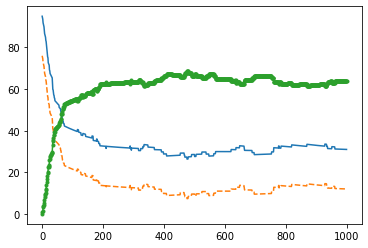

In [103]:
# %load solutionCodeExercise8.py

# Importing the needed python packages
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import time 
import sys
from pylab import *
from matplotlib.patches import Rectangle
# biological parameters definition
kon=0.1
koff=0.5
T=0.001
# simulation parameters definition
N=1000 # number of timepoints
tmax=T*N # final time
nA = np.zeros(N+1)
nB = np.zeros(N+1)
nAB = np.zeros(N+1)
Times = np.zeros(N+1)
for i in range(0,N):  # Python starts indexing rows and columns at 0, not 1 as in the algorithm above
        Times[i] = i*T
# initialization
nA[0]=95
nB[0]=76
nAB[0]=0
# simulation of time evolution
for i in range(0,N):
    # reaction rates in the state at time t
    w1=kon*nA[i]*nB[i]
    w2=koff*nAB[i]
    # generate random number of reactions following the Poisson distribution
    n1=np.random.poisson(w1*T, size=None)
    n2=np.random.poisson(w2*T, size=None) 
    # compute right hand sides:
    DeltaN=-w1*T  + w2*T-n1 + n2
    nA[i+1]=nA[i]+DeltaN
    nB[i+1]=nB[i]+DeltaN
    nAB[i+1]=nAB[i]-DeltaN


# plotting the results
plt.figure()
plt.plot(nA,'-')
plt.plot(nB,'--')
plt.plot(nAB,'.-')
plt.show()



We will remember that, if we have to decrease the time step too much when trying to integrate numerically the Langevin equation to improve convergence properties, we might get out of the range of validity of the equation itself (in particular, the expression of the stochastic terms in terms of normally-distributed random numbers). If this happens, it is then safer to use the Tau-leaping algorithm, which replaces the terms  $\sqrt{w_{\mu}(S)*\tau}n_{\mu}$ with normally distributed $n_{\mu}$ by $1*P_{\mu}$ where $P_{\mu}$ are drawn from the Poisson distribution of parameter $ w_{\mu}(S)*\tau $.

### 3) The Gillespie algorithm

As illustrated by the plots output in the examples Exercises 7-8, the Langevin integration and Tau-leaping algorithms assume that there is a large enough total number of molecules of each type so that fluctuations resulting from individual reactions do not significantly change the state of the system. It was a necessary requirement to be able to compute the rates $w_{\mu}(S)$ once and for all at the beginning of each integration interval. This statement does not hold true when the number of biomolecules, or model objects in general, get even lower so that the disappearance or appearance of a single object produces important relative changes in the number of objects. In  this case, the chemical master equation has to be integrated directly. 

One elegant way to do so is to use the Gillespie algorithm. The algorithm uses the fact that, in a <b> Markovian chain of reactions </b>, the <b> timelag </b> $\Delta t$ <b> between two consecutive reactions is a random variable that follows an exponential distribution </b>. In other words if we are at the time $t$ and an elementary reaction has just happened, the probability that the next reaction will happen at the time $t+\Delta t$ is :

$$P(next\,reaction\,at\,time\,t+\Delta t)= a_{tot}e^{- a_{tot}*\Delta t}.$$

In this expression, $ a_{tot}$ is called the <b> total propensity </b> and is related to the reaction rates as will be discussed below; the probability decreases exponentially with time, meaning that we have a probability 0 to have to wait forever before something elementary happens in the microscopic system, and that the “forever” timescale is defined by $1/ a_{tot}$, the inverse of the rates. Makes sense. 

What is key to figure out here, is that <b> because we are interested in the time of the NEXT molecular event, nothing happens before this time </b>. There is no elementary reaction happening, that could cause the numbers of molecules of some species to change, and therefore the rates to change, and therefore the total propensity to change. Hence, on the interval $[t,t+\Delta t]$, $a_{tot}$ <b> is a constant </b>. And we use this to generate a <b> random date for the next event </b>. 

Specifically, we generate a random number $r_1$ between 0 and 1, following a uniform distribution, and identify this number to $ e^{- a_{tot}*\Delta t}$ : $ r_1=e^{- a_{tot}*\Delta t}$. The time of the next molecular event is then chosen as: 

$$t+\Delta t = t+\frac{1}{a_{tot}} \ln \frac{1}{r_1} >t.$$

The second step of the algorithm is to actually <b> choose which elementary reaction </b> happens at this time $t+\Delta t$, and in order to do this we have to understand what the total propensity is. 

In well-mixed system, the propensity of a given (bio)chemical reaction $R_{\mu}$ is deduced from the probability, given a state $s$ of the system at time $t$, that the reaction happens somewhere inside the reaction volume during the next inﬁnitesimal time interval $[t,t+dt)$. If $P$ is this probability, then 

$$P=a_{\mu}(s)*dt$$

and this conditional probability defines the propensity $a_{\mu}(s)$ of the reaction $R_{\mu}. $a_{\mu}(s)$  depends on the state $s$ of the system at the time $t$. The total propensity is nothing else than the sum over all possible chemical reactions of the individual propensities $a_{\mu}(s)$:

$$a_{tot}=\sum_{\mu=1}^{M} a_{\mu}(s)$

The propensities $a_{\mu}(s)$ are nothing else than the reaction rates $w_{\mu}(s)$ in the CME. But in the context of the Gillespie algorithm, we use the word “propensity”. 
In summary: 
- for a reaction $R_{\mu}$ that occurs at a rate independent of all the molecule populations within the reaction volume, the propensity is just the reaction rate: 

$$ a_{\mu}=k_{\mu}$$

- for a reaction $R_{\mu}$ that involves a single reactant specie $S_i$, represented by a number $n_i$ of molecules in the reaction volume, the propensity is: 

$$ a_{\mu}=k_{\mu}*n_i$$

This applies to molecule destruction $S_i \rightarrow \emptyset $ or conversion to another molecule, with no intermediate state $S_i \rightarrow S_j $. 

- for a reaction $R_{\mu}$ that involves two different molecular reactants $S_i$ and $S_j$, represented by a number $n_i,n_j$ of molecules in the reaction volume, the propensity is: 

$$ a_{\mu}=k_{\mu}*n_i*n_j$$

This applies to any bimolecular reactions $S_i+S_j \rightarrow products $, and is crucial because at the microscopic scale, when Markovian modeling is required, bimolecular reactions are the basis of any more complex reaction. We stress that if the reaction involves <b> two copies of the same molecule </b>, then the propensity is  

$$ a_{\mu}=\frac{k_{\mu}}{2}*n_i*(n_i-1)$$

because if $n_i$ molecules are available to serve as the first molecule of the reaction, then only $n_i-1$ are available to play the role of the second molecule. 

And that’s it! Indeed, trimolecular reactions, and more complex reactions will always be decomposed in bimolecular reaction because at the molecular scale, chemical reactions happen when <b> randomly moving molecules collide with the adequate orientation and energy .</b> Bimolecular collisions are frequent, and trimolecular collisions might happen, sometimes. However, bimolecular collisions with the right orientation and energies are rare, and trimolecular collisions with the right orientations and energies never happen. 

Once propensities $a_{\mu}$ have been written for all reactions $R_{\mu}$, the total propensity is :

$$a_{tot} = \sum_{\mu=1}^M a_{\mu}, $

and as described above, it is used to find the time of the next reaction. To determine which reaction will happen in the simulated biochemical system, we <b> generate a second random number </b> $r_2$ between $0$ and $1$, following the uniform distribution. Then, we pick the first reaction $R_k$ for which: 

$$\sum_{\mu=1}^k a_{\mu}>r_2*a_{tot}.$$

Two examples are graphically represented on the figure below:


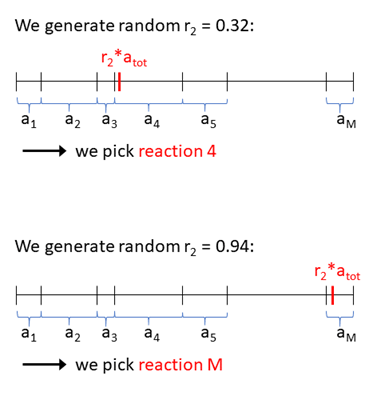


With this generating method (or any mathematically equivalent one), we have the following stochastic simulation algorithm (SSA) for constructing an exact numerical realization of the CME: 

- 1. Initialize all stochastic variables $S_i$ to some value $S_{i,0}$ in the initial state: $S_i(0)= S_{i,0}$
- 2. Compute all reaction propensities $a_{\mu}$, and the total propensity $a_{tot} = \sum_{\mu}^M a_{\mu}$
- 3. Generate two random numbers $r_1$ and $r_2$, pulled from the uniform distribution on $[0,1]$; Compute the time of the next reaction: $t+\Delta t = t+\frac{1}{a_{tot}} \ln \frac{1}{r_1} >t;$ the use the random number $r_2$ to deduce which reaction will happen at time $t+\Delta t$: the first reaction $R_k$ for which: $\sum_{\mu=1}^k a_{\mu}>r_2*a_{tot}.$
- 4. “update” all stochastic variables $S_i(t+\Delta t)$ by actually implementing the selected reaction $R_k$ and modify the value $S_i(t)$ of the molecular species involved in this selected reaction only. All other stochastic variables are not modified.
- 5. Go back to step 2

The formulas that define the propensities in function of the number of molecules of each species for monomolecular and bimolecular reactions are very similar to the corresponding terms in the right hand side of an ODE/PDE formulation of the same chemical reactions, in a deterministic model (typically, rate of change proportional to $[S_i]*[S_j]$, the concentrations in both molecules). Therefore, it is quite simple to convert an ODE model into its stochastic counterpart using the Gillespie algorithm. However, we stress that rates constants have to be rescaled, to take into account that propensities involve the number of molecules, while ODE/PDEs are generally written for concentrations. As a result, Gillespie rate constants for bimolecular reactions will have to be divided by the reaction volume, Gillespie rate constants independent of the number of molecules will have to be multiplied by the reaction volume, and the diffusion coefficient will have to be divided by the square of the mesh size (see below, next section).   

<b> Exercise 9: </b> Let us look again at the Susceptible-Infected-Recovered model in epidemiology (SIR model). This model is a popular approach to study the spread of infectious diseases and uses a partition of the total population of individuals into three subpopulations of susceptible, infectious and recovered individuals (denoted by the populations $S$, $I$ and $R$, respectively). The ODE description of the model is: 

$$\frac{dS}{dt} = b -\beta * S(t)*I(t) - \mu_S*S(t)$$

$$\frac{dI}{dt} = \beta * S(t)*I(t) - \mu_I*I(t) - \alpha * I(t)$$

$$\frac{dR}{dt} = \alpha *I(t) - \mu_R*R(t),$$

where susceptible individuals get infected with a rate that is proportional to the infected population (contagion), $\beta *I(t)$, and Infected individuals recover from infection with a rate $\alpha$ with some immunity, so that they don’t fall back into the “susceptible” group but rather into a “Recovered” group that is not susceptible to the infection again (immunity). We now assume that $S$, $I$ and $R$ are stochastic variables, that follow a Markovian evolution (this is a simplifying assumption - this is definitely not true in reality, in epidemic/pandemic times people remember the entire history of the epidemic/pandemic and adapt their behavior in function). What are the <b> elementary reactions </b>, analogous to simple biochemical reactions, that would describe this system? What are the propensities of these reactions? Write a Gillespie algorithm in Python that simulates the stochastic evolution of the system from the initial state where there is 1 infected individual over a population of 100 individuals. All rates will be varied to explore the parameter space and conclude. 



In [104]:
%run solutionExercise9.py

The elementary reactions are: the birth of susceptible individuals with propensity b, their death with propensity \mu_S*S(t), their infection with propensity beta * S(t)*I(t), the death of infected individuals with propensity mu_I*I(t) w ith mu_I>mu_S, the recovery of infected individuals with rate alpha * I(t), and the death of recovered individuals with propensity mu_R*R(t), with mu_R<mu_S.


In [145]:
# %load solutionCodeExercise9.py



In practice, the algorithm is efficient as it automatically scales the timestep to the reaction rates. If the model is made of very rare reactions, the timestep will be automatically generated as “large”. The drawback is that when the model mixes fast and slow time-scales, i.e. encompasses both reactions with high rates and reactions with low rates, to reach a stationary state we need to simulate a long time (due to the low rates) but the high rates will ensure that the total propensity is high and thus timesteps will be short. Hence, simulations of models encompassing both fast and slow kinetics will be very computationally demanding. In this situation, it is recommended to use approximation methods for time-scale separation, such as Quasi Steady State approximations for the “fast” part of the system, or Fokker Planck/Langevin approximations for part of the model. 

In conclusion, this algorithm simulates exactly the microscopic stochastic dynamics, by simulating <b> all </b> the biochemical reactions with no exception, and no approximation. The only requirements to use this algorithm is that the CME is properly defined, which is achieved if the system is “well-mixed” (so homogeneous reaction rates can be defined within the reaction volume, and molecules have the same probability to be everywhere within this volume), and also that the waiting times between two reactions follow an exponential distribution, which is a characteristic of Markovian systems. 
Non Markovian equivalents of the Gillespie algorithm are being developed but this is still an on-going field of research (see for instance https://bmcsystbiol.biomedcentral.com/articles/10.1186/1752-0509-9-S3-S8)



### 4) Space-dependent Gillespie algorithm
The application of the Gillespie algorithm to simulate the stochastic evolution of a biochemical system relies on the underlying hypothesis that the system is well-mixed, i.e. that the probability to find reactants for the individual reactions is the same everywhere within the reaction volume. If heterogeneities exist in the reaction volume, then the reaction volume has to be discretized into sub-volumes in which the stochastic variables can be considered as well mixed, and the reaction propensities homogeneous. 

We use then an approach very similar to what we did when we derived the CME for a diffusing system: for any biological species $S_i$, the molecules $S_i$ in two  distinct elementary sub-volumes indexed by $r$ and by $r’$  are considered as distinct species in the simulations. Hence, the “same” biochemical reactions within distinct sub-volumes $r$ and $r’$ are considered as different reactions (and if the populations of reactants are different in the two sub-volumes, they will have different propensities), and in addition the transport of one biomolecule of species $S_i$ between two elementary volumes indexed by $r$ and by $r’$ is modeled by an <b> elementary reaction that simultaneously destroys one unit of </b> $S_i$ <b> in </b> $r$ <b> and creates one unit of </b> $S_i$ <b> in </b> $r’$.

This way, we obtain a <b> space-dependent Gillespie algorithm </b> that can be summarized as follows: 
- 0. Discretize the reaction volume into an array of sub-volumes, indexed in some way (for instance, following coordinates on a regular grid on a surface or a 3D volume…)
- 1. Initialize all stochastic variables $S_i$ to some value $S_{i,0}$ in <b> all of the elementary sub-volumes </b> $r$ in the initial state: $S_{i,r}(0)= S_{i,r,0}$
- 2. Compute the propensities $a_{\mu,r}$ of all the reactions $R_{\mu}$ in all the sub-volumes $r$, <b> including the propensities that correspond to transport reactions </b> and compute the total propensity $a_{tot} = \sum_{\mu,r}^M a_{\mu,r}$ (that will be summed over all sub-volumes). Then, the rest of the algorithm is the same.
- 3. Generate two random numbers $r_1$ and $r_2$, pulled from the uniform distribution on $[0,1]$; Compute the time of the next reaction: $t+\Delta t = t+\frac{1}{a_{tot}} \ln \frac{1}{r_1} >t;$ then use the random number $r_2$ to deduce at the same time which reaction will happen at time $t+\Delta t$ and where on the grid this reaction will happen: it will be the first reaction for which: $\sum_{\mu=1,r} a_{\mu,r}>r_2*a_{tot}$. In other words, we will sum the propensities over the reaction index $\mu$ and the space index $r$; the order of the summations does not matter, we can sum first all sub-volumes for a given reaction and then sum over all reactions, or sum all reactions within one sub-volume and move to the next sub-volume; at some point, the sum will exceed $r_2*a_{tot}$: then, we pick the values of $\mu$ and $r$, and we will implement the reaction $R_{\mu}$ in the sub-volume $r$ at the next step.
- 4. “update” all stochastic variables $S_i(t+\Delta t)$ by actually implementing the selected reaction and modify the value $S_i(t)$ of the molecular species involved in this selected reaction only, in the selected sub-volume only. All other stochastic variables are not modified.
- 5. Go back to step 2

Let’s do an example to see how it works: we consider a membrane-bound protein $P$, that is freely diffusing on the plasma membrane, and has a natural tendency to dimerize. This protein $P$ is embedded in a more complex model, but we want to focus on the dynamics of aggregation of the protein. $P$ has a total copy number $N$ which is assumed to be not large enough so that we can define a concentration at the smallest relevant length-scale of the model. Hence, we chose to simulate the aggregation dynamics stochastically.    

Question 1: what are the elementary reactions to consider, in the Gillespie sense, and what are their propensity?


In [172]:
#%run solutionQuestion1.py